## Imports and Load Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
color = sns.color_palette()
import time
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)
import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


In [4]:
#chunk_size = 10**6
#chunk_list = []
start_time = time.time()
df = pd.read_csv("/home/samar/internship/test1/data/train_ver2.csv" , nrows = 1000000) 
end_time = time.time()
print("Duration : {}".format(end_time - start_time))


#df = pd.read_csv("data/xtest.csv")
# unique_cust_ids = pd.Series(df["ncodpers"].unique())
# limit_people = 12000
# limit_people = 100
# unique_id    = unique_ids.sample(n=limit_people)
# df           = df[df.ncodpers.isin(unique_id)]

Duration : 18.731670141220093


In [5]:
df.columns

Index(['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
       'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel',
       'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext',
       'conyuemp', 'canal_entrada', 'indfall', 'tipodom', 'cod_prov',
       'nomprov', 'ind_actividad_cliente', 'renta', 'segmento',
       'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1'],
      dtype='object')

In [7]:
df.columns = ['Status_Dt', 'Cust_ID', 'Emp_Status', 'Cust_Ctry', 'Cust_Sex', 'Age', 'Join_Dt',
                'Is_New_Cust', 'Cust_Since', 'Relship_Status','Lst_Dt_Primary_Cust', 'Cust_Type_Mth_Beg', 
                'Cust_Relship_Type_Mth_Beg', 'Residence_Ctry', 'Is_Foreigner', 'Is_Spouse_Emp', 'Join_Channel', 'Deceased_Flg', 
                'Address_Type', 'Cust_Province_Cd', 'Cust_Province_Name', 'Cust_Active_Status', 'Gross_HHLD_Income',
                'Cust_Segment', 'Savings_Acct', 'Guarantees', 'Cur_Acct', 'Derivative_Acct', 'Payroll_Acct',
                'Junior_Acct', 'Mas_Particular_Acct', 'Particular_Acct', 'Particular_Plus_Acct', 'Short_Term_Deposits',
                'Med_Term_Deposits', 'Long_Term_Deposits', 'e-Acct', 'Funds', 'Mortgage', 'Pension1', 'Loans',
                'Taxes', 'Credit_Card', 'Securities', 'Home_Acct', 'Payroll', 'Pension2', 'Direct_Debit']

In [8]:
df.shape

(1000000, 48)

In [9]:
date_attribs = ['Status_Dt', 'Join_Dt', 'Lst_Dt_Primary_Cust']
for attrib in date_attribs:
    df[attrib] = pd.to_datetime(df[attrib],format="%Y-%m-%d")

In [11]:
df.Status_Dt.unique()

array(['2015-01-28T00:00:00.000000000', '2015-02-28T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [12]:
numeric_attribs = ['Age', 'Is_New_Cust', 'Cust_Since', 'Relship_Status', 'Address_Type', 'Cust_Active_Status']
for attrib in numeric_attribs:
    df[attrib] = pd.to_numeric(df[attrib], errors='coerce')

In [13]:
df[df.duplicated()]

,Status_Dt,Cust_ID,Emp_Status,Cust_Ctry,Cust_Sex,Age,Join_Dt,Is_New_Cust,Cust_Since,Relship_Status,...,Mortgage,Pension1,Loans,Taxes,Credit_Card,Securities,Home_Acct,Payroll,Pension2,Direct_Debit


## EDA
We will understand each of these columns a little better:<br>
'Status_Dt', 'Cust_ID', 'Emp_Status', 'Cust_Ctry', 'Cust_Sex', 'Age', 'Join_Dt',
'Is_New_Cust', 'Cust_Since', 'Relship_Status','Lst_Dt_Primary_Cust', 'Cust_Type_Mth_Beg', 
'Cust_Relship_Type_Mth_Beg', 'Residence_Ctry', 'Is_Foreigner', 'Is_Spouse_Emp', 'Join_Channel', 'Deceased_Flg', 
'Address_Type', 'Cust_Province_Cd', 'Cust_Province_Name', 'Cust_Active_Status', 'Gross_HHLD_Income',
'Cust_Segment'

### Set viewing options

In [14]:
pylab.rcParams['figure.figsize'] = (10, 6) 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Status Date

Text(0.5, 0, 'Year and Month of Observation')

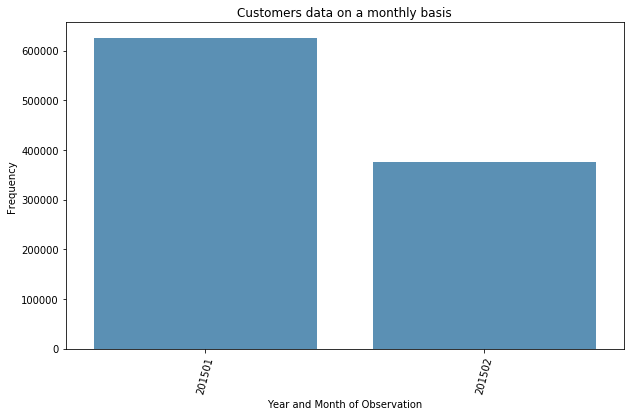

In [15]:
status_year_month = df['Status_Dt'].apply(lambda x: (100*x.year) + x.month)
cnt_status_year_month = status_year_month.value_counts()
plt.figure(figsize=(10,6))
sns.barplot(cnt_status_year_month.index, cnt_status_year_month.values, alpha=0.8, color=color[0])
plt.xticks(rotation=75)
plt.title('Customers data on a monthly basis')
plt.ylabel('Frequency')
plt.xlabel('Year and Month of Observation')

<h3> Customer Ids </h3>

In [16]:
unique_cust_ids, freq =  np.unique(df['Cust_ID'], return_counts=True)

In [17]:
print('There are {} number of unique customers'.format(len(unique_cust_ids)))
np.max(freq)

There are 626159 number of unique customers


2

In [18]:
num_cust_ids = df.groupby(['Cust_ID']).agg('size').value_counts()

Text(0, 0.5, 'Number of customers')

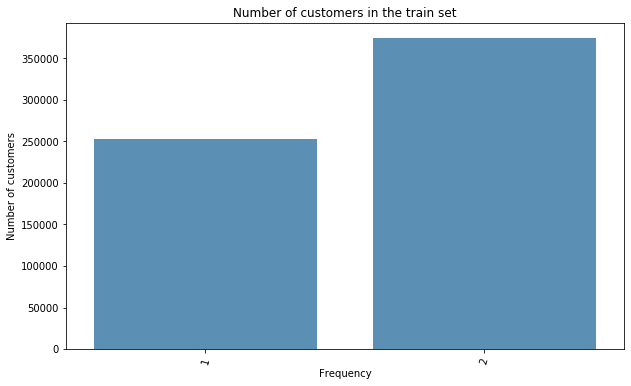

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(num_cust_ids.index, num_cust_ids.values, alpha=0.8, color=color[0])
plt.xticks(rotation=75)
plt.title('Number of customers in the train set')
plt.xlabel('Frequency')
plt.ylabel('Number of customers')

### Employee Status

Number of unique values in Employee Status :  5


Text(0, 0.5, 'Number of Employees')

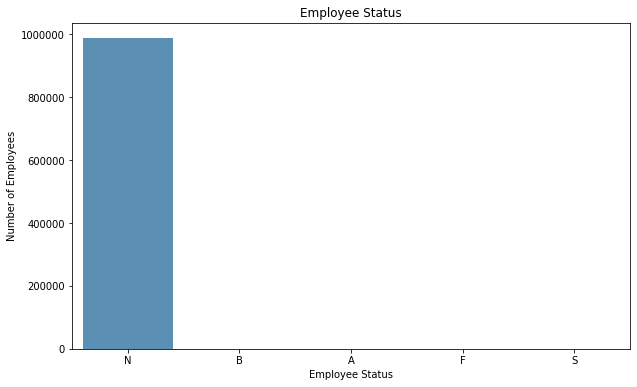

In [20]:
emp_status = df.Emp_Status.value_counts()
len_unique = len(emp_status)
print("Number of unique values in Employee Status : ",len_unique)
plt.figure(figsize=(10,6))
plt.ticklabel_format(style = 'plain')
sns.barplot(emp_status.index, emp_status.values, alpha=0.8, color=color[0])
plt.title('Employee Status')
plt.xlabel('Employee Status')
plt.ylabel('Number of Employees')

Number of unique values in Employee Status :  5


Text(0, 0.5, 'Number of Employees-Log')

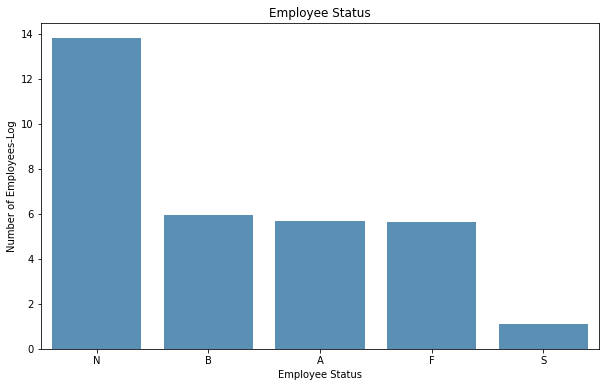

In [21]:
print("Number of unique values in Employee Status : ",len_unique)
plt.figure(figsize=(10,6))
sns.barplot(emp_status.index, np.log1p(emp_status.values), alpha=0.8, color=color[0])
plt.title('Employee Status')
plt.xlabel('Employee Status')
plt.ylabel('Number of Employees-Log')

### Customer Country

Number of unique values in Cusotmer Country :  113


Text(0, 0.5, 'Number of Employees')

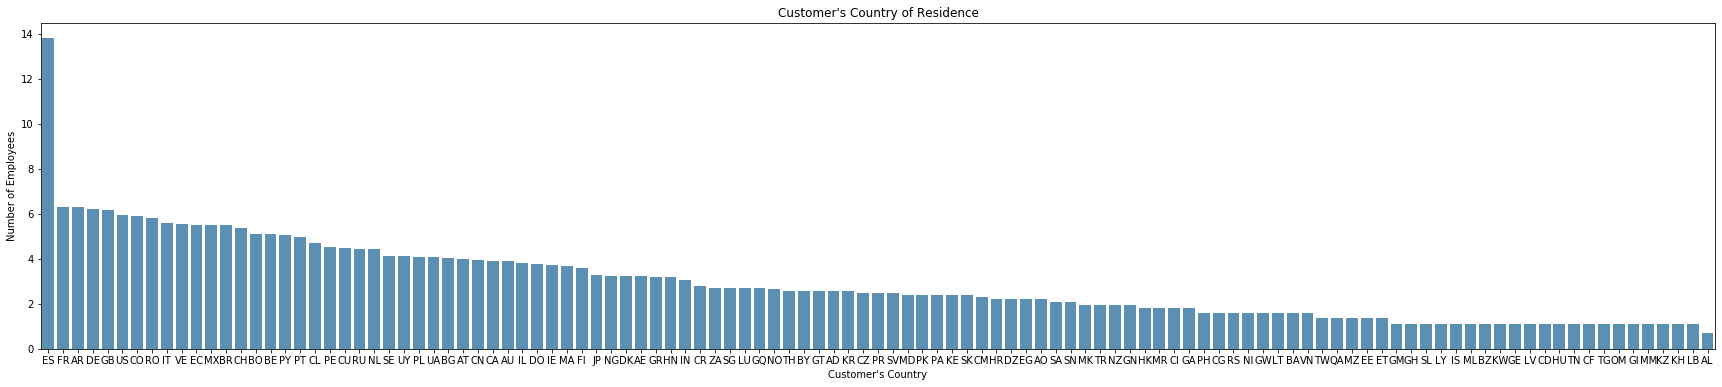

In [25]:
cust_country = df['Cust_Ctry'].value_counts()
len_unique = len(cust_country)

print("Number of unique values in Cusotmer Country : ",len_unique)

plt.figure(figsize=(30,6))
sns.barplot(cust_country.index, np.log1p(cust_country.values), alpha=0.8, color=color[0])
plt.title('Customer\'s Country of Residence')
plt.xlabel('Customer\'s Country')
plt.ylabel('Number of Employees')

### Customer's Sex

Number of unique values in Customer Sex :  2


Text(0, 0.5, 'Number of Employees')

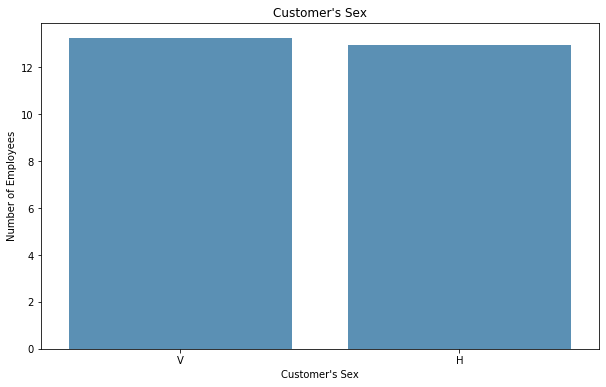

In [26]:
cust_sex = df['Cust_Sex'].value_counts()
len_unique = len(cust_sex)
print("Number of unique values in Customer Sex : ",len_unique)

plt.figure(figsize=(10,6))
sns.barplot(cust_sex.index, np.log1p(cust_sex.values), alpha=0.8, color=color[0])
plt.title('Customer\'s Sex')
plt.xlabel('Customer\'s Sex')
plt.ylabel('Number of Employees')

### Customer's Age

Number of unique values in Customer Age :  114
Most aged Customer is :  116.0
Junior most customer is :  2.0
Average age of customer is :  43.26962408690501


Text(0, 0.5, 'Number of Employees')

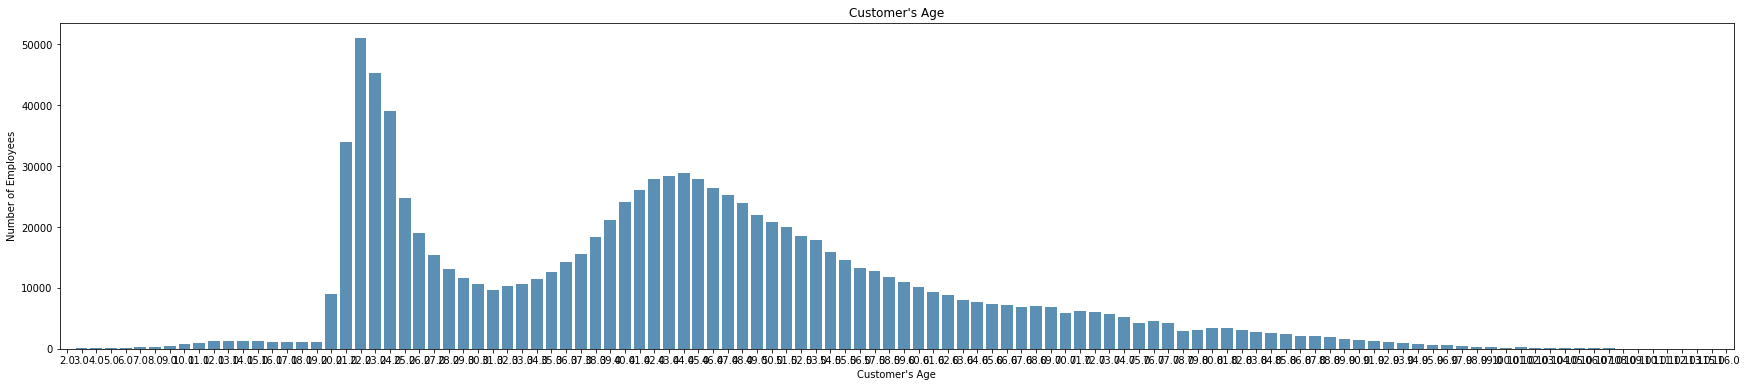

In [27]:
cust_age = df['Age'].value_counts()
len_unique = len(cust_age)
print("Number of unique values in Customer Age : ",len_unique)
print("Most aged Customer is : ", np.max(df.Age))
print("Junior most customer is : ", np.min(df.Age))
print("Average age of customer is : ", np.mean(df.Age))
plt.figure(figsize=(30,6))
sns.barplot(cust_age.index, cust_age.values, alpha=0.8, color=color[0])
plt.title('Customer\'s Age')
plt.xlabel('Customer\'s Age')
plt.ylabel('Number of Employees')

### Customer's Join Dates
#### Join Months

Number of unique months in Customer's Joined Date :  12
Most Customer's joined in the month of  :  10.0
Few Customer's joined in the month of :  6.0


Text(0, 0.5, 'Number of Employees')

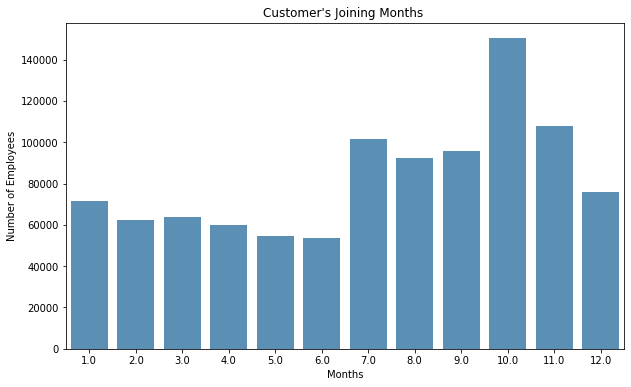

In [28]:
join_month = df['Join_Dt'].dt.month.value_counts()

len_unique = len(join_month)
print("Number of unique months in Customer\'s Joined Date : ",len_unique)
print("Most Customer\'s joined in the month of  : ", join_month.index[0])
print("Few Customer\'s joined in the month of : ", join_month.index[11])

plt.figure(figsize=(10,6))
sns.barplot(join_month.index, join_month.values, alpha=0.8, color=color[0])
plt.title('Customer\'s Joining Months ')
plt.xlabel('Months')
plt.ylabel('Number of Employees')

#### Join Day

Number of unique days in Customer's Joined Date :  31
Most Customer's joined on  :  3.0
Few Customer's joined on :  2.0


Text(0, 0.5, 'Number of Employees')

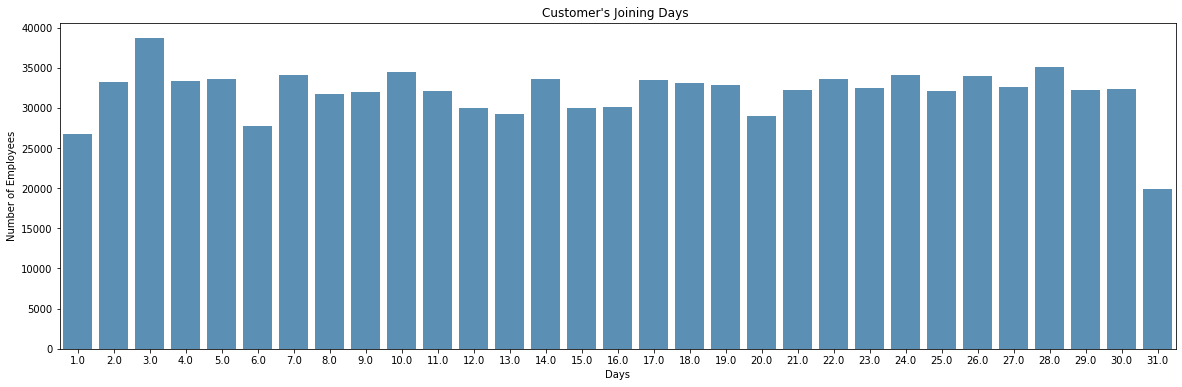

In [29]:
join_day = df['Join_Dt'].dt.day.value_counts()

len_unique = len(join_day)
print("Number of unique days in Customer\'s Joined Date : ",len_unique)
print("Most Customer\'s joined on  : ", join_day.index[0])
print("Few Customer\'s joined on : ", join_day.index[11])

plt.figure(figsize=(20,6))
sns.barplot(join_day.index, join_day.values, alpha=0.8, color=color[0])
plt.title('Customer\'s Joining Days ')
plt.xlabel('Days')
plt.ylabel('Number of Employees')

#### Join Year and Month

Minimum value of Join Date :  199501.0
Maximum value of Join Date :  201502.0


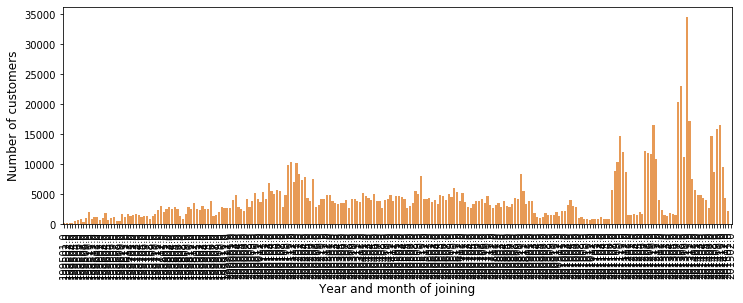

In [30]:
join_year_month = df['Join_Dt'].apply(lambda x: (100*x.year) + x.month)
cnt_join_year_month = join_year_month.value_counts()
print("Minimum value of Join Date : ", min(cnt_join_year_month.index))
print("Maximum value of Join Date : ", max(cnt_join_year_month.index))

plt.figure(figsize=(12,4))
sns.barplot(cnt_join_year_month.index, cnt_join_year_month.values, alpha=0.8, color=color[1])
plt.xlabel('Year and month of joining', fontsize=12)
plt.ylabel('Number of customers', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
cnt_join_year_month = cnt_join_year_month.sort_index().reset_index()
cnt_join_year_month = cnt_join_year_month.iloc[185:]
cnt_join_year_month.columns = ['yearmonth', 'number_of_customers']

### Is_New_Customer

Number of unique values in Is_New_Customer :  2


Text(0, 0.5, 'Number of Customers')

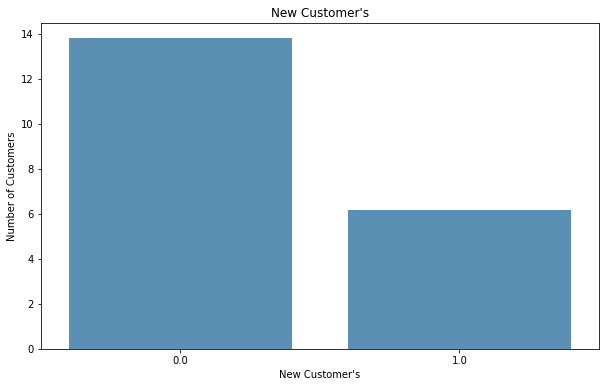

In [36]:
is_new_customer = df['Is_New_Cust'].value_counts()
len_unique = len(is_new_customer.unique())
print("Number of unique values in Is_New_Customer : ",len_unique)

plt.figure(figsize=(10,6))
sns.barplot(is_new_customer.index, np.log1p(is_new_customer.values), alpha=0.8, color=color[0])
plt.title('New Customer\'s')
plt.xlabel('New Customer\'s')
plt.ylabel('Number of Customers')

### Customer_Since

Number of unique values in Customer_Since :  247
Most number of people have been a customer for the past 21.0 months


Text(0, 0.5, 'Months')

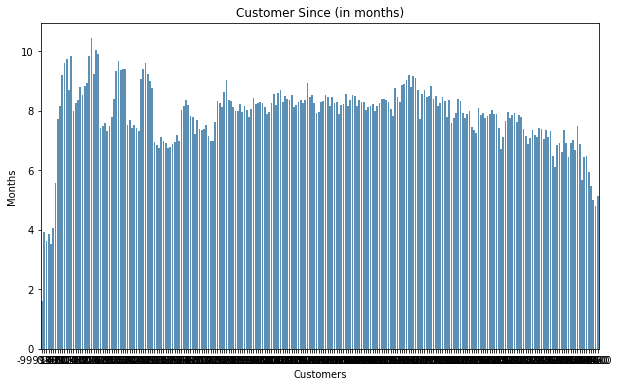

In [37]:
customer_since = df['Cust_Since'].value_counts()
len_unique = len(customer_since.unique())
print("Number of unique values in Customer_Since : ",len_unique)

print("Most number of people have been a customer for the past {} months".format(customer_since.index[0]))
plt.figure(figsize=(10,6))
sns.barplot(customer_since.index, np.log1p(customer_since.values), alpha=0.8, color=color[0])
plt.title('Customer Since (in months)')
plt.xlabel('Customers')
plt.ylabel('Months')

### Relationship_Status

Number of unique values in Relationship Status :  2


Text(0, 0.5, 'Customers')

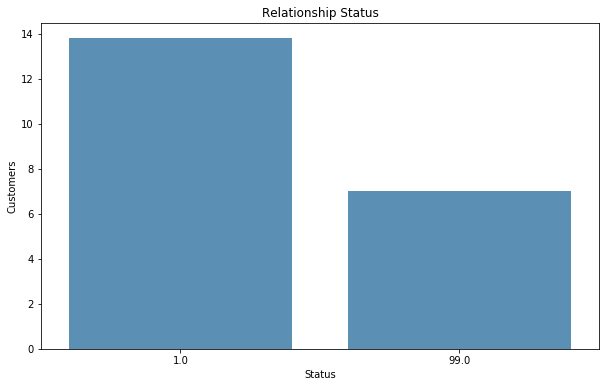

In [38]:
relationship_status = df.Relship_Status.value_counts()
len_unique = len(relationship_status.unique())
print("Number of unique values in Relationship Status : ",len_unique)

plt.figure(figsize=(10,6))
sns.barplot(relationship_status.index, np.log1p(relationship_status.values), alpha=0.8, color=color[0])
plt.title('Relationship Status')
plt.xlabel('Status')
plt.ylabel('Customers')

### Customer's Residing Country

Number of unique values in Residing Country :  2


Text(0, 0.5, 'Customers')

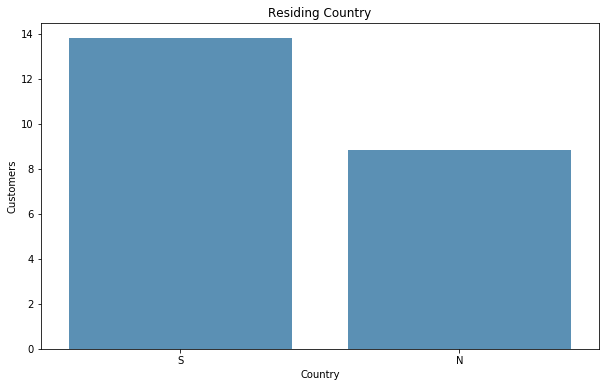

In [39]:
residing_country = df.Residence_Ctry.value_counts()
len_unique = len(residing_country.unique())
print("Number of unique values in Residing Country : ",len_unique)

plt.figure(figsize=(10,6))
sns.barplot(residing_country.index, np.log1p(residing_country.values), alpha=0.8, color=color[0])
plt.title('Residing Country')
plt.xlabel('Country')
plt.ylabel('Customers')

### Foreigner's

Number of unique values in Is_Foreigner :  2


Text(0, 0.5, 'Customers')

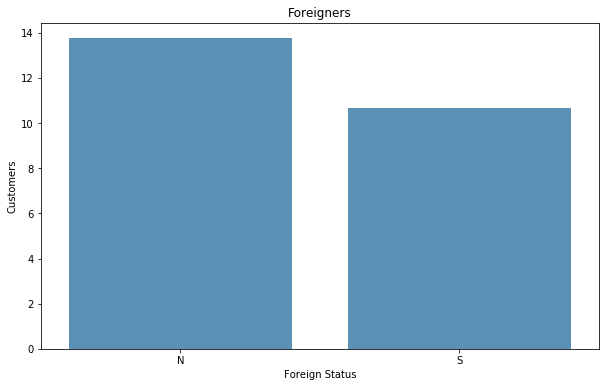

In [40]:
is_foreigner = df.Is_Foreigner.value_counts()
len_unique = len(is_foreigner.unique())
print("Number of unique values in Is_Foreigner : ",len_unique)

plt.figure(figsize=(10,6))
sns.barplot(is_foreigner.index, np.log1p(is_foreigner.values), alpha=0.8, color=color[0])
plt.title('Foreigners')
plt.xlabel('Foreign Status')
plt.ylabel('Customers')

### Is Spouse an Employee

Number of unique values in Is_Spouse_an_employee :  2


Text(0, 0.5, 'Customers')

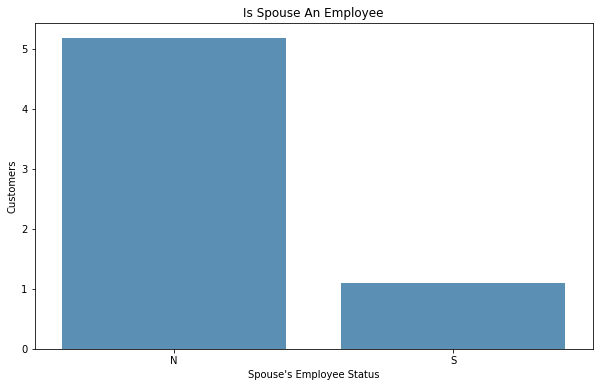

In [41]:
is_spouse_an_employee = df.Is_Spouse_Emp.value_counts()
len_unique = len(is_spouse_an_employee.unique())
print("Number of unique values in Is_Spouse_an_employee : ",len_unique)

plt.figure(figsize=(10,6))
sns.barplot(is_spouse_an_employee.index, np.log1p(is_spouse_an_employee.values), alpha=0.8, color=color[0])
plt.title('Is Spouse An Employee')
plt.xlabel('Spouse\'s Employee Status')
plt.ylabel('Customers')

### Channel's used to join

In [42]:
df["Join_Channel"].value_counts()

KAT    313944
KFC    259035
KHE    249254
KFA     37733
KAS      8190
KAG      7511
KAA      6338
KAY      6125
KAB      5957
KHK      5935
KHD      5878
KCC      4876
KAE      4753
KBZ      4422
RED      4366
KFD      3885
KAI      3580
KEY      3366
KAW      3305
KAF      3117
013      2976
KAR      2934
KAH      2372
KCI      2300
KAZ      2104
007      1995
KCH      1981
KAJ      1921
KAQ      1526
KAP      1225
KAD      1118
KHF      1058
KAM      1028
KHC       852
KFP       795
KHL       785
KGV       784
KAC       777
KGX       768
KEJ       735
KDR       708
KAL       633
KFT       629
KBH       624
KBO       624
KES       609
KFG       586
KEW       576
KAO       567
KCG       564
KCB       488
KFJ       466
KFS       448
KFF       441
KEN       436
KBQ       414
KCL       374
KFN       360
KGY       356
KFU       354
KFL       324
KBF       290
KCM       290
KED       290
KFK       289
KCD       268
KBU       260
KEL       254
KEZ       247
KEG       192
KDU       191
KBR   

Number of unique values in Channels used to join :  116
Number of data points in Channel KAT : 313944 ( 31.394 %)
Number of data points in Channel KFC : 259035 ( 25.904 %)
Number of data points in Channel KHE : 249254 ( 24.925 %)
Number of data points in Channel KFA : 37733 ( 3.773 %)
Number of data points in Channel KAS : 8190 ( 0.819 %)
Number of data points in Channel KAG : 7511 ( 0.751 %)
Number of data points in Channel KAA : 6338 ( 0.634 %)
Number of data points in Channel KAY : 6125 ( 0.612 %)
Number of data points in Channel KAB : 5957 ( 0.596 %)
Number of data points in Channel KHK : 5935 ( 0.594 %)
Number of data points in Channel KHD : 5878 ( 0.588 %)
Number of data points in Channel KCC : 4876 ( 0.488 %)
Number of data points in Channel KAE : 4753 ( 0.475 %)
Number of data points in Channel KBZ : 4422 ( 0.442 %)
Number of data points in Channel RED : 4366 ( 0.437 %)
Number of data points in Channel KFD : 3885 ( 0.388 %)
Number of data points in Channel KAI : 3580 ( 0.358 %)

Text(0, 0.5, 'Customers')

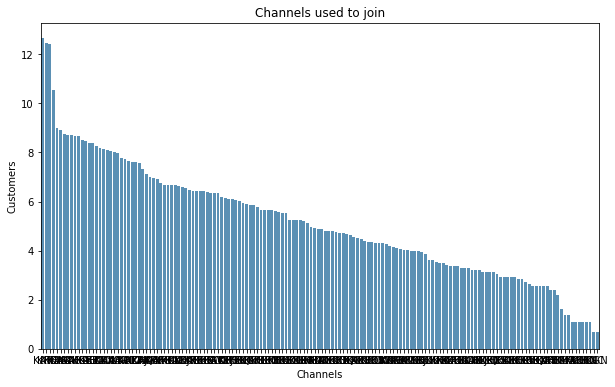

In [43]:
join_channel = df.Join_Channel.value_counts()
len_unique = len(join_channel.unique())
print("Number of unique values in Channels used to join : ",len_unique)

sorted_distb = np.argsort(-join_channel.values)
for i in sorted_distb:
    print('Number of data points in Channel', str(join_channel.index[i]), ':', join_channel.values[i], '(', np.round((join_channel.values[i]/df.shape[0]*100), 3), '%)')

plt.figure(figsize=(10,6))
sns.barplot(join_channel.index, np.log1p(join_channel.values), alpha=0.8, color=color[0])
plt.title('Channels used to join')
plt.xlabel('Channels')
plt.ylabel('Customers')

### Deceased Customers

0    1000000
Name: Deceased_Flg, dtype: int64
Number of unique values in Deceased Flag :  1
Number of customers who are deceased  :  []


Text(0, 0.5, 'Customers')

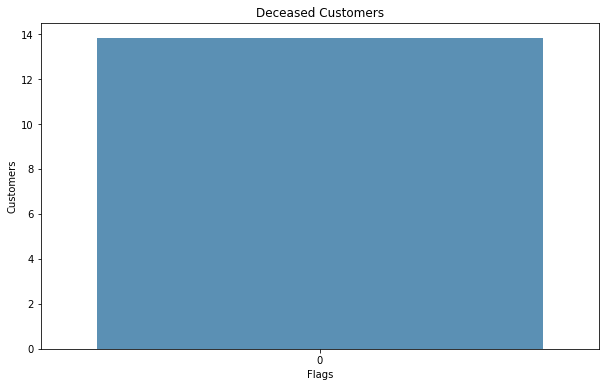

In [48]:
df['Deceased_Flg'] = (df['Deceased_Flg'] == 'S').astype(int)
deceased_flg = df.Deceased_Flg.value_counts()
len_unique = len(deceased_flg.unique())
print("Number of unique values in Deceased Flag : ",len_unique)
print("Number of customers who are deceased  : ",deceased_flg[deceased_flg.index == 1].values)


plt.figure(figsize=(10,6))
sns.barplot(deceased_flg.index, np.log1p(deceased_flg.values), alpha=0.8, color=color[0])
plt.title('Deceased Customers')
plt.xlabel('Flags')
plt.ylabel('Customers')

### Primary Address of customers

Number of unique values in Customer's primary address :  1


Text(0, 0.5, 'Customers')

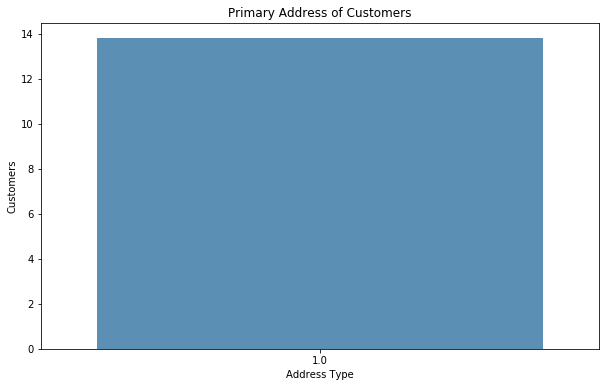

In [49]:
address_type = df.Address_Type.value_counts()
len_unique = len(address_type.unique())
print("Number of unique values in Customer's primary address : ",len_unique)

plt.figure(figsize=(10,6))
sns.barplot(address_type.index, np.log1p(address_type.values), alpha=0.8, color=color[0])
plt.title('Primary Address of Customers')
plt.xlabel('Address Type')
plt.ylabel('Customers')

### Customer's Address
#### Province Code

Number of unique values in Customer's Address :  52


Text(0, 0.5, 'Customers')

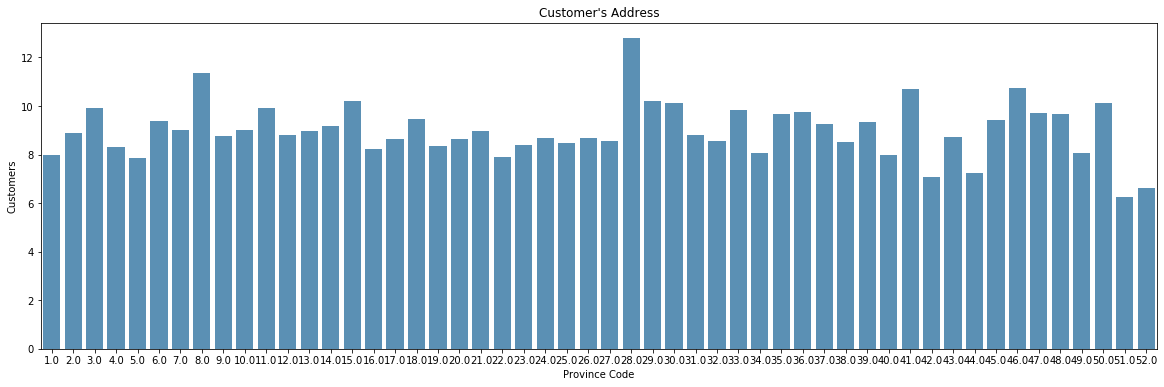

In [50]:
province_cd = df.Cust_Province_Cd.value_counts()
len_unique = len(province_cd.unique())
print("Number of unique values in Customer's Address : ",len_unique)

plt.figure(figsize=(20,6))
sns.barplot(province_cd.index, np.log1p(province_cd.values), alpha=0.8, color=color[0])
plt.title('Customer\'s Address')
plt.xlabel('Province Code')
plt.ylabel('Customers')

#### Province Name

Number of unique values in Province Name :  52


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51]), <a list of 52 Text xticklabel objects>)

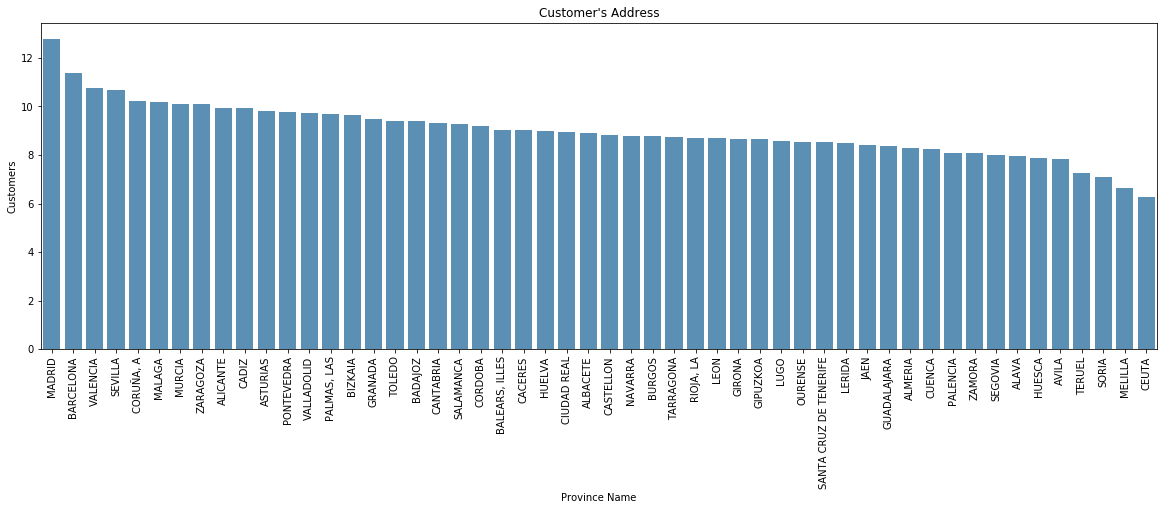

In [51]:
province_nm = df.Cust_Province_Name.value_counts()
len_unique = len(province_nm.unique())
print("Number of unique values in Province Name : ",len_unique)

plt.figure(figsize=(20,6))
sns.barplot(province_nm.index, np.log1p(province_nm.values), alpha=0.8, color=color[0])
plt.title('Customer\'s Address')
plt.xlabel('Province Name')
plt.ylabel('Customers')
plt.xticks(rotation='vertical')

### Customer's Activity Status

Number of unique values in Province Name :  2


Text(0, 0.5, 'Customers')

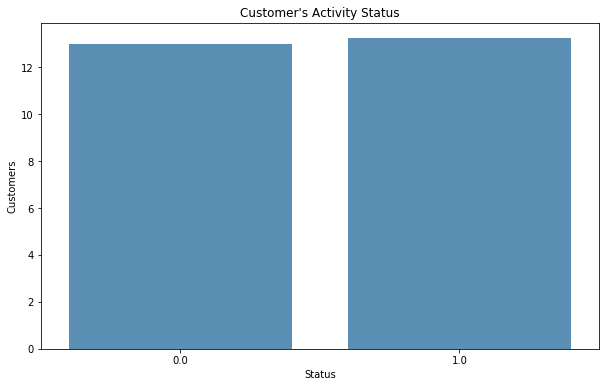

In [52]:
cust_active_status = df.Cust_Active_Status.value_counts()
len_unique = len(cust_active_status.unique())
print("Number of unique values in Province Name : ",len_unique)

plt.figure(figsize=(10,6))
sns.barplot(cust_active_status.index, np.log1p(cust_active_status.values), alpha=0.8, color=color[0])
plt.title('Customer\'s Activity Status')
plt.xlabel('Status')
plt.ylabel('Customers')

### Gross Household Income

Average household income is 128697.79179913459
The maximum household income is 28894395.51
The minimum household income is 1202.73
The median household income is 97993.755


Text(0, 0.5, 'Income')

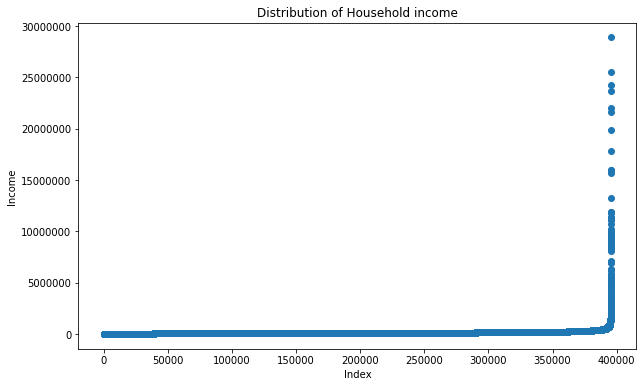

In [53]:
hhld_income = np.sort(df.Gross_HHLD_Income.unique())

print ('Average household income is {}'.format(np.nanmean(hhld_income)))
print ('The maximum household income is {}'.format(np.nanmax(hhld_income)))
print ('The minimum household income is {}'.format(np.nanmin(hhld_income)))
print ('The median household income is {}'.format(np.nanmedian(hhld_income)))

plt.figure(figsize=(10,6))
plt.scatter(range(len(hhld_income)), hhld_income)
plt.title('Distribution of Household income')
plt.ticklabel_format(style = 'plain')
plt.xlabel('Index')
plt.ylabel('Income')

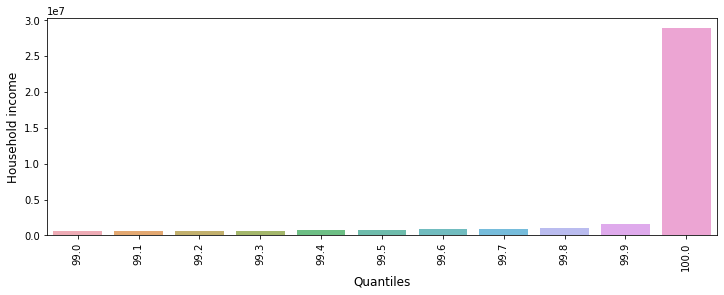

In [54]:
quantile_series = df.Gross_HHLD_Income.quantile(np.arange(0.99,1,0.001))
plt.figure(figsize=(12,4))
sns.barplot((quantile_series.index*100), quantile_series.values, alpha=0.8)
plt.ylabel('Household income', fontsize=12)
plt.xlabel('Quantiles', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

### Customer Segment

Number of unique values in Customer Segment :  3


Text(0, 0.5, 'Customers')

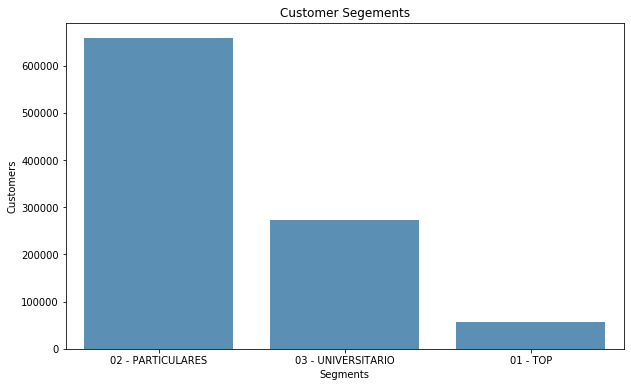

In [55]:
cust_segment = df.Cust_Segment.value_counts()
len_unique = len(cust_segment.unique())
print("Number of unique values in Customer Segment : ",len_unique)

plt.figure(figsize=(10,6))
sns.barplot(cust_segment.index, cust_segment.values, alpha=0.8, color=color[0])
plt.title('Customer Segements')
plt.xlabel('Segments')
plt.ylabel('Customers')

### Target Variables
#### Popular Product

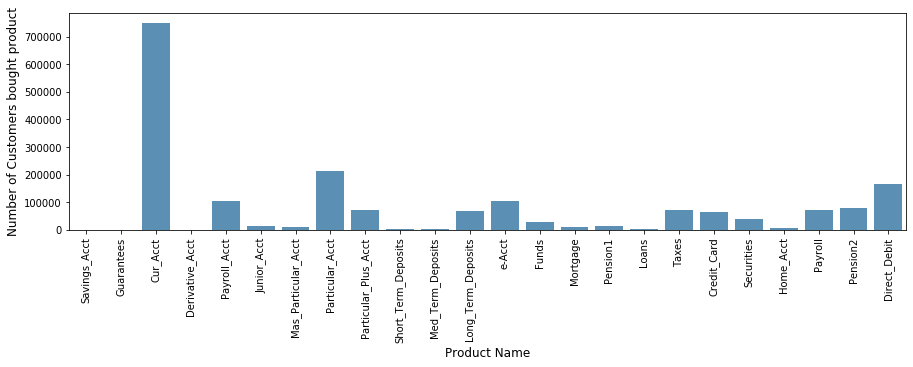

In [56]:
target_variables = list(df.columns[24:])
target_counts = df[target_variables].astype('float64').sum(axis=0)
plt.figure(figsize=(15,4))
sns.barplot(target_counts.index, target_counts.values, alpha=0.8, color=color[0])
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Number of Customers bought product', fontsize=12)
plt.ticklabel_format(style = 'plain', axis='y')
plt.xticks(rotation='vertical')
plt.show()

#### Popularity of products by Sex and Activity Index

In [57]:
df_a = df.loc[:, ['Cust_Sex', 'Cust_Active_Status']].join(df.loc[:, "Savings_Acct": "Direct_Debit"])
df_a = df_a.groupby(['Cust_Sex', 'Cust_Active_Status']).sum()
df_a = df_a.T
df_a.head()

Cust_Sex                   H                   V          
Cust_Active_Status       0.0       1.0       0.0       1.0
Savings_Acct            16.0      30.0      32.0      99.0
Guarantees               0.0      11.0       0.0      28.0
Cur_Acct            165051.0  164824.0  173925.0  242357.0
Derivative_Acct         14.0      71.0      45.0     459.0
Payroll_Acct           645.0   40897.0     888.0   62595.0

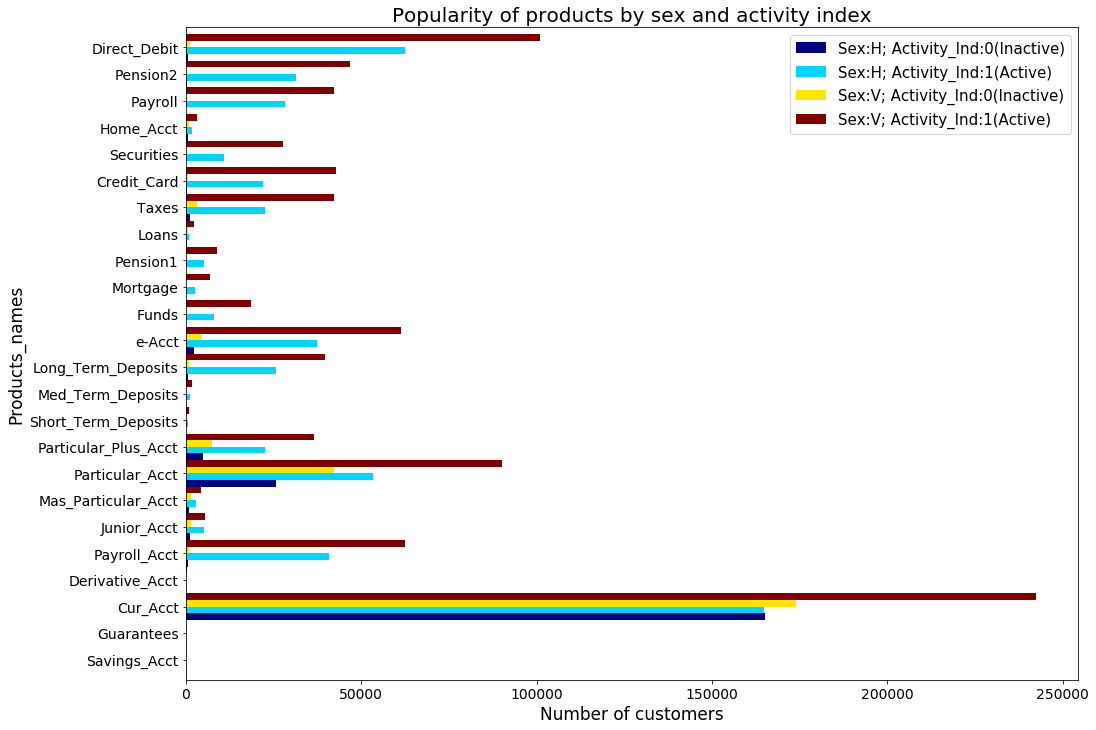

In [58]:
df_a.plot(kind='barh', fontsize=14, figsize=[16,12], colormap='jet', width=1)
plt.title('Popularity of products by sex and activity index', fontsize=20) 
plt.xlabel('Number of customers', fontsize=17) 
plt.ylabel('Products_names', fontsize=17) 
plt.legend(["Sex:H; Activity_Ind:0(Inactive)", "Sex:H; Activity_Ind:1(Active)", "Sex:V; Activity_Ind:0(Inactive)", 
            "Sex:V; Activity_Ind:1(Active)"], prop={'size':15}) 

In [59]:
exclude = ['Cur_Acct']
df_a = df_a.T
df_a = df_a.drop(exclude, axis=1).T

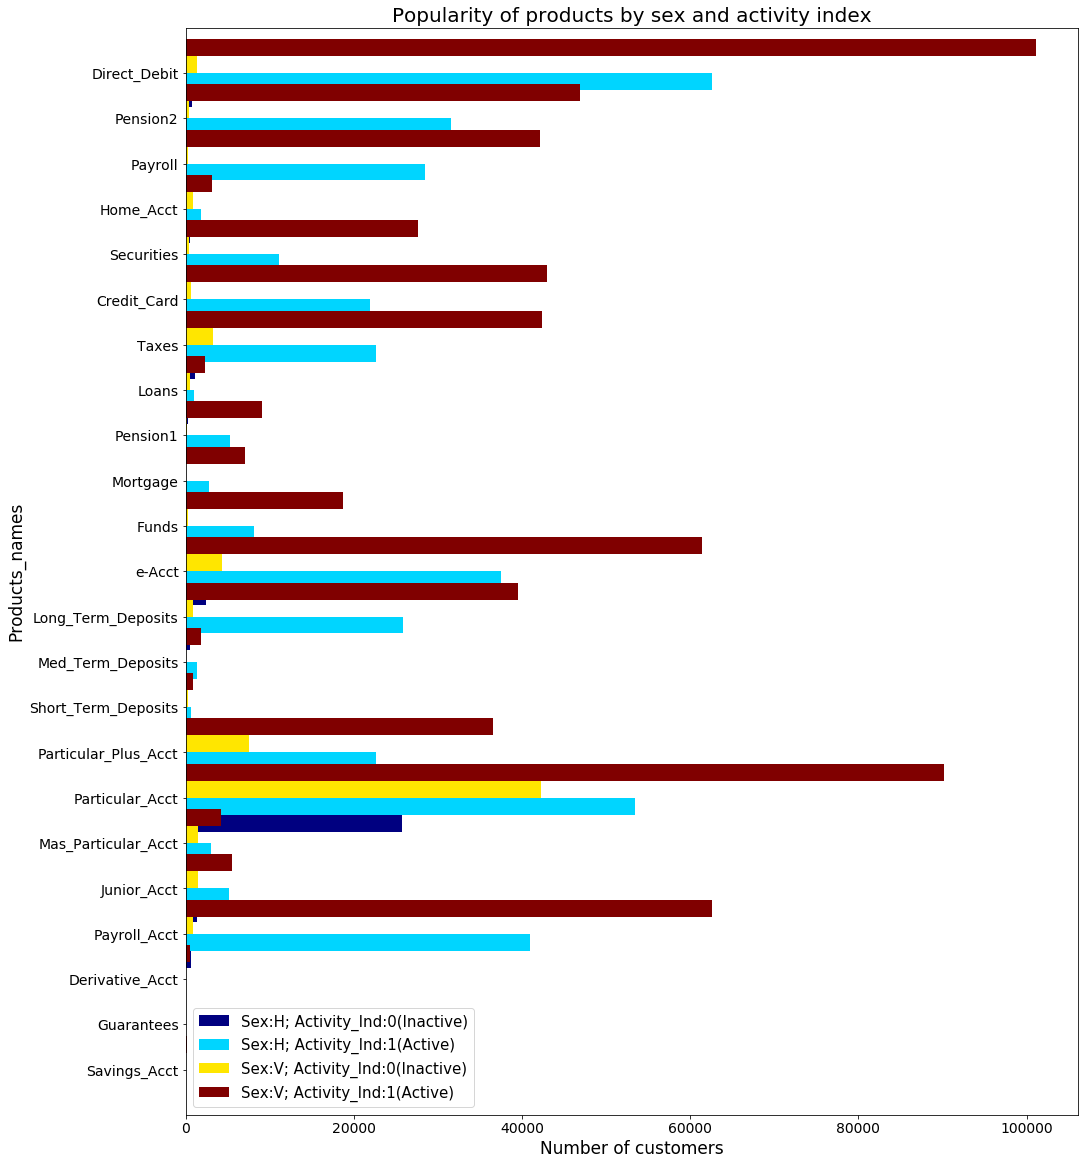

In [60]:
df_a.plot(kind='barh', fontsize=14, figsize=[16,20], colormap='jet', width=1.5)
plt.title('Popularity of products by sex and activity index', fontsize=20) 
plt.xlabel('Number of customers', fontsize=17) 
plt.ylabel('Products_names', fontsize=17) 
plt.legend(["Sex:H; Activity_Ind:0(Inactive)", "Sex:H; Activity_Ind:1(Active)", "Sex:V; Activity_Ind:0(Inactive)", 
            "Sex:V; Activity_Ind:1(Active)"], prop={'size':15}) 

Let's understand how many customers hold Guarantees and Savings_Acct by excluding all the other accounts

In [61]:
tmp = df.head()

In [62]:
df_a

Cust_Sex                    H                 V          
Cust_Active_Status        0.0      1.0      0.0       1.0
Savings_Acct             16.0     30.0     32.0      99.0
Guarantees                0.0     11.0      0.0      28.0
Derivative_Acct          14.0     71.0     45.0     459.0
Payroll_Acct            645.0  40897.0    888.0   62595.0
Junior_Acct            1291.0   5153.0   1516.0    5509.0
Mas_Particular_Acct     947.0   2987.0   1509.0    4233.0
Particular_Acct       25758.0  53481.0  42278.0   90182.0
Particular_Plus_Acct   5054.0  22669.0   7564.0   36564.0
Short_Term_Deposits     203.0    641.0    273.0     910.0
Med_Term_Deposits        10.0   1294.0     31.0    1811.0
Long_Term_Deposits      538.0  25830.0    834.0   39577.0
e-Acct                 2429.0  37455.0   4346.0   61435.0
Funds                   130.0   8097.0    233.0   18674.0
Mortgage                 18.0   2767.0     54.0    7049.0
Pension1                 58.0   5312.0    106.0    9051.0
Loans                   259.0   1022.0    529.0    2314.0
Taxes                  1154.0  22677.0   3240.0   42323.0
Credit_Card             396.0  21976.0    676.0   42915.0
Securities              198.0  11042.0    417.0   27630.0
Home_Acct               523.0   1877.0    883.0    3141.0
Payroll                 221.0  28422.0    297.0   42189.0
Pension2                256.0  31494.0    374.0   46863.0
Direct_Debit            773.0  62587.0   1321.0  101113.0

In [65]:
df[df.Savings_Acct == 1]['Status_Dt'].value_counts()

2015-02-28    89
2015-01-28    88
Name: Status_Dt, dtype: int64

In [66]:
df[df.Guarantees == 1]['Status_Dt'].value_counts()

2015-02-28    20
2015-01-28    19
Name: Status_Dt, dtype: int64

#### Popularity of products by household income

In [67]:
df_a = df.groupby(pd.cut(df['Gross_HHLD_Income'], [0,60000,120000,180000,240000, pd.np.inf], right=False)).sum()
df_a.head()

,Cust_ID,Age,Is_New_Cust,Cust_Since,Relship_Status,Cust_Type_Mth_Beg,Deceased_Flg,Address_Type,Cust_Province_Cd,Cust_Active_Status,Gross_HHLD_Income,Savings_Acct,Guarantees,Cur_Acct,Derivative_Acct,Payroll_Acct,Junior_Acct,Mas_Particular_Acct,Particular_Acct,Particular_Plus_Acct,Short_Term_Deposits,Med_Term_Deposits,Long_Term_Deposits,e-Acct,Funds,Mortgage,Pension1,Loans,Taxes,Credit_Card,Securities,Home_Acct,Payroll,Pension2,Direct_Debit
Gross_HHLD_Income,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"[0.0, 60000.0)",109625995729,5168735.0,61.0,10112457.0,133029.0,132843.0,0,132833.0,3553976.0,63357.0,6.089176e+09,14,2,106251,63,10695,989,1106,19712,6104,227,279,5017,9399,1756,1019,910,904,6119,5331,2635,491,7060.0,7832.0,17928
"[60000.0, 120000.0)",249383563547,14353831.0,161.0,31061726.0,342252.0,341876.0,0,341860.0,9314185.0,189362.0,3.009567e+10,34,6,261056,165,35398,4194,3411,66689,23214,703,1078,21135,34443,7517,3584,3775,1586,21295,20583,10593,1917,24015.0,26406.0,56265
"[120000.0, 180000.0)",111881649469,8164749.0,82.0,17586809.0,181185.0,181113.0,0,181087.0,4787491.0,112229.0,2.645457e+10,45,6,130964,122,23572,3389,1939,45699,15881,421,687,15638,23690,6128,2170,3454,532,15335,15327,8597,1496,16536.0,18207.0,35479
"[180000.0, 240000.0)",46672486938,3949382.0,39.0,7832385.0,83555.0,83561.0,0,83555.0,2206321.0,54200.0,1.722465e+10,30,15,58852,74,11624,1730,957,23368,8197,163,338,8607,12243,3545,1050,2137,172,8592,7996,5336,806,8119.0,9052.0,17316
"[240000.0, inf)",45768323768,4174504.0,35.0,10400457.0,85482.0,85498.0,0,85482.0,2201789.0,54667.0,3.531845e+10,32,8,60680,71,11134,1516,776,24228,8432,157,288,7613,12294,4306,920,2502,196,10210,8224,6219,980,7228.0,8415.0,17656


In [68]:
# Let's drop the columns which are unnecessary for this step
df_a = df_a.loc[:, "Savings_Acct": "Direct_Debit"]
df_a = df_a.T
df_a.head()

Gross_HHLD_Income  [0.0, 60000.0)  [60000.0, 120000.0)  [120000.0, 180000.0)  [180000.0, 240000.0)  [240000.0, inf)
Savings_Acct                 14.0                 34.0                  45.0                  30.0             32.0
Guarantees                    2.0                  6.0                   6.0                  15.0              8.0
Cur_Acct                 106251.0             261056.0              130964.0               58852.0          60680.0
Derivative_Acct              63.0                165.0                 122.0                  74.0             71.0
Payroll_Acct              10695.0              35398.0               23572.0               11624.0          11134.0

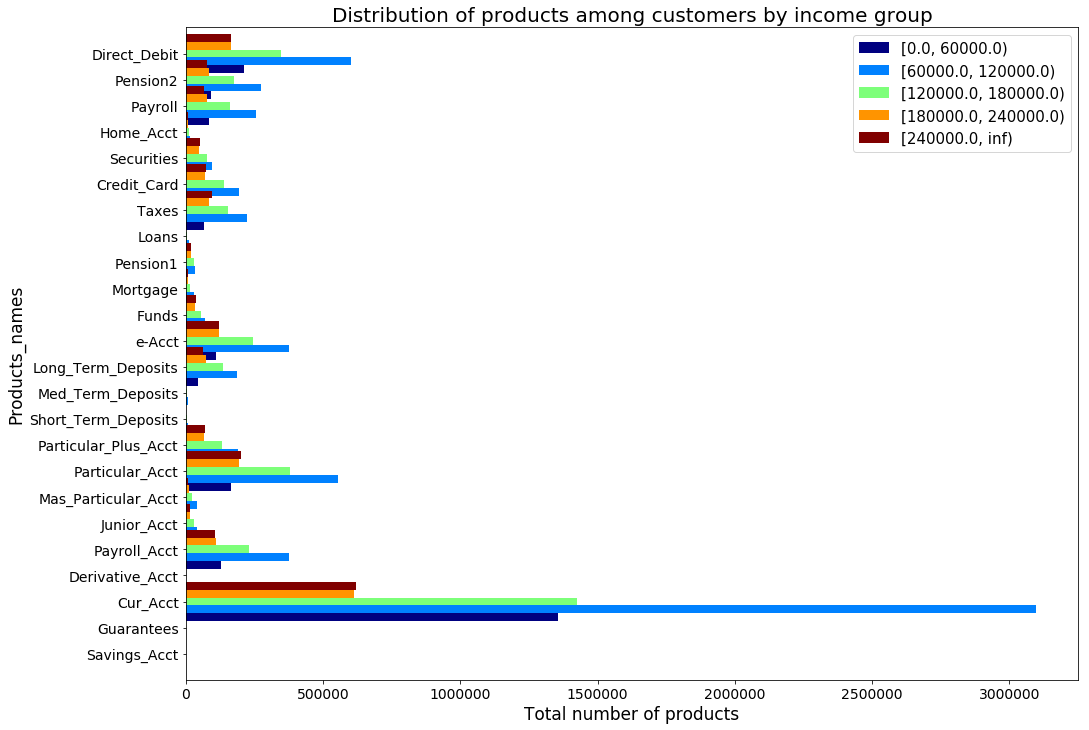

In [51]:
df_a.plot(kind='barh', fontsize=14, figsize=[16,12], colormap='jet', width=1.5)
plt.title('Distribution of products among customers by income group', fontsize=20, color='black') 
plt.xlabel('Total number of products', fontsize=17, color='black') 
plt.ylabel('Products_names', fontsize=17, color='black') 
plt.legend(prop={'size':15}, loc=1) 

#### Popularity of products by different Age group

In [69]:
df["Age"]   = pd.to_numeric(df["Age"], errors="coerce") 

In [70]:
df_a = df.groupby(pd.cut(df['Age'], [0,20,40,60,80,100, pd.np.inf], right=False)).sum()
df_a.head()

,Cust_ID,Age,Is_New_Cust,Cust_Since,Relship_Status,Cust_Type_Mth_Beg,Deceased_Flg,Address_Type,Cust_Province_Cd,Cust_Active_Status,Gross_HHLD_Income,Savings_Acct,Guarantees,Cur_Acct,Derivative_Acct,Payroll_Acct,Junior_Acct,Mas_Particular_Acct,Particular_Acct,Particular_Plus_Acct,Short_Term_Deposits,Med_Term_Deposits,Long_Term_Deposits,e-Acct,Funds,Mortgage,Pension1,Loans,Taxes,Credit_Card,Securities,Home_Acct,Payroll,Pension2,Direct_Debit
Age,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"[0.0, 20.0)",8708192026,176013.0,6.0,1309842.0,15313.0,12969.0,0,12961.0,360440.0,10273.0,1.765365e+09,0,0,14,0,0,12893,0,2,0,0,0,66,0,0,4,0,0,15,0,0,0,4.0,34.0,0
"[20.0, 40.0)",402651760132,10975099.0,178.0,18205011.0,449704.0,397026.0,0,396980.0,10332351.0,173618.0,3.926049e+10,6,10,348523,64,27816,576,3192,23134,12729,502,391,6799,22262,2074,580,654,809,14034,10586,4068,1438,18108.0,18507.0,46280
"[40.0, 60.0)",199264667511,20013915.0,224.0,52665835.0,448498.0,417350.0,0,417334.0,11242005.0,283282.0,5.163578e+10,159,27,285718,391,65416,0,4863,126295,46548,1185,2057,39857,62817,16885,8528,11099,2712,46269,46431,26168,4703,48784.0,50153.0,101178
"[60.0, 80.0)",57891211818,8624988.0,67.0,15007588.0,141406.0,127208.0,0,127196.0,3471768.0,73908.0,1.765653e+10,12,2,88873,115,10377,0,1366,45297,10459,271,510,15815,17313,6526,773,2722,571,7901,8418,7557,227,4160.0,8963.0,16111
"[80.0, 100.0)",13970646375,2888749.0,9.0,4709676.0,40501.0,33545.0,0,33543.0,935734.0,17415.0,4.653936e+09,0,0,22309,19,1403,0,254,16235,2073,69,188,4209,3251,1619,7,52,30,1145,524,1476,56,70.0,1322.0,2205


In [71]:
df_a = df_a.loc[:, "Savings_Acct": "Direct_Debit"]
df_a = df_a.T
df_a.head()

Age              [0.0, 20.0)  [20.0, 40.0)  [40.0, 60.0)  [60.0, 80.0)  [80.0, 100.0)  [100.0, inf)
Savings_Acct             0.0           6.0         159.0          12.0            0.0           0.0
Guarantees               0.0          10.0          27.0           2.0            0.0           0.0
Cur_Acct                14.0      348523.0      285718.0       88873.0        22309.0         720.0
Derivative_Acct          0.0          64.0         391.0         115.0           19.0           0.0
Payroll_Acct             0.0       27816.0       65416.0       10377.0         1403.0          13.0

#### Popularity of products by different channels used to join

In [73]:
df["Join_Channel"].value_counts().head(5)

KAT    313944
KFC    259035
KHE    249254
KFA     37733
KAS      8190
Name: Join_Channel, dtype: int64

In [74]:
df_a = df.loc[:, ['Join_Channel']].join(df.loc[:, "Savings_Acct": "Direct_Debit"])
interested_channels = ['KHE', 'KAT', 'KFC', 'KHQ', 'KFA']
df_a = df_a[df_a.Join_Channel.isin(interested_channels)]
df_a = df_a.groupby(['Join_Channel']).sum()
df_a = df_a.T
df_a.head()

Join_Channel,KAT,KFA,KFC,KHE
Savings_Acct,101.0,6.0,34.0,0.0
Guarantees,17.0,0.0,16.0,0.0
Cur_Acct,208677.0,24418.0,180495.0,243937.0
Derivative_Acct,242.0,19.0,245.0,1.0
Payroll_Acct,49664.0,5204.0,32931.0,3793.0


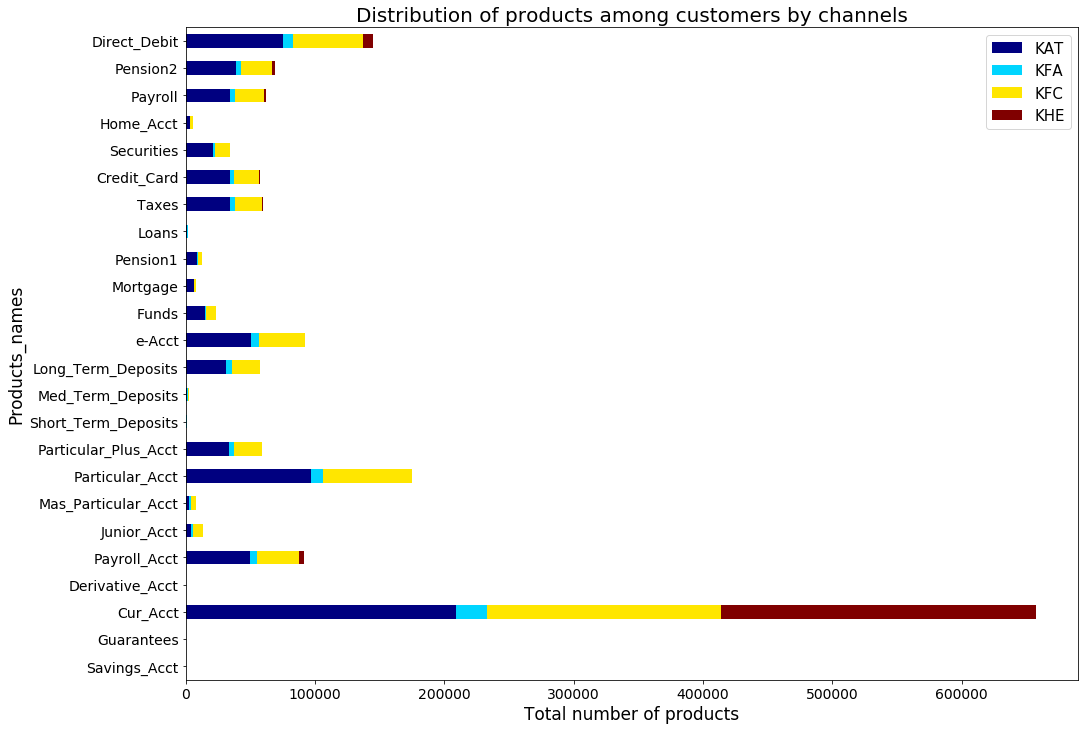

In [75]:
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='jet')
plt.title('Distribution of products among customers by channels', fontsize=20, color='black') 
plt.xlabel('Total number of products', fontsize=17, color='black') 
plt.ylabel('Products_names', fontsize=17, color='black') 
plt.legend(prop={'size':15}, loc=1) 

#### Popularity of products by different customer seniority

In [76]:
df["Cust_Since"]   = pd.to_numeric(df["Cust_Since"], errors="coerce") 

In [77]:
df.Cust_Since.min(), df.Cust_Since.max()

(-999999.0, 246.0)

In [78]:
df.loc[df["Cust_Since"]<0, 'Cust_Since'] = 0

In [79]:
df.Cust_Since.min(), df.Cust_Since.max()

(0.0, 246.0)

In [80]:
df_a = df.groupby(pd.cut(df['Cust_Since'], [0,50,100,150,200, 260, pd.np.inf], right=False)).sum()
df_a.head()

,Cust_ID,Age,Is_New_Cust,Cust_Since,Relship_Status,Cust_Type_Mth_Beg,Deceased_Flg,Address_Type,Cust_Province_Cd,Cust_Active_Status,Gross_HHLD_Income,Savings_Acct,Guarantees,Cur_Acct,Derivative_Acct,Payroll_Acct,Junior_Acct,Mas_Particular_Acct,Particular_Acct,Particular_Plus_Acct,Short_Term_Deposits,Med_Term_Deposits,Long_Term_Deposits,e-Acct,Funds,Mortgage,Pension1,Loans,Taxes,Credit_Card,Securities,Home_Acct,Payroll,Pension2,Direct_Debit
Cust_Since,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"[0.0, 50.0)",416027912945,10957572.0,484.0,9514488.0,430094.0,369312.0,0,369236.0,9535052.0,163448.0,3.475562e+10,0,0,332262,18,20847,2322,3890,52,44,1185,129,8076,23548,1256,37,413,32,5479,5170,1583,4,12494.0,13539.0,38194
"[50.0, 100.0)",101741998574,6574764.0,0.0,10670290.0,147996.0,134668.0,0,134668.0,3650212.0,85190.0,1.612401e+10,0,6,96632,84,14033,2563,5454,5031,32446,163,624,14267,14215,2944,138,927,1209,9932,9411,4522,364,9294.0,10291.0,22224
"[100.0, 150.0)",106739808342,10299164.0,0.0,25663750.0,220623.0,207597.0,0,207589.0,5721066.0,124033.0,2.571539e+10,56,8,141711,218,23166,6662,168,72909,13316,257,1051,16079,22681,5633,3225,2610,1903,19014,15871,8365,2037,15925.0,17490.0,36188
"[150.0, 200.0)",54129722966,11487946.0,0.0,36739943.0,232813.0,215467.0,0,215467.0,5845259.0,142584.0,2.878027e+10,91,15,135343,197,32721,1922,139,115095,18467,343,1085,21423,32966,10790,4562,6239,661,24102,24428,16051,2762,23397.0,26092.0,48411
"[200.0, 260.0)",4242975667,3483645.0,0.0,13501761.0,65590.0,62258.0,0,62258.0,1624346.0,43624.0,9.807226e+09,30,10,40209,72,14258,0,25,18612,7578,79,257,6934,12255,6511,1930,4338,319,10867,11083,8766,1257,10019.0,11575.0,20777


In [81]:
df_a = df_a.loc[:, "Savings_Acct": "Direct_Debit"]
df_a = df_a.T
df_a.head()

Cust_Since       [0.0, 50.0)  [50.0, 100.0)  [100.0, 150.0)  [150.0, 200.0)  [200.0, 260.0)  [260.0, inf)
Savings_Acct             0.0            0.0            56.0            91.0            30.0           0.0
Guarantees               0.0            6.0             8.0            15.0            10.0           0.0
Cur_Acct            332262.0        96632.0        141711.0        135343.0         40209.0           0.0
Derivative_Acct         18.0           84.0           218.0           197.0            72.0           0.0
Payroll_Acct         20847.0        14033.0         23166.0         32721.0         14258.0           0.0

#### Ownership of products by customer seniority

In [84]:
df["tot_products"] = df.loc[:,"Savings_Acct": "Direct_Debit"].sum(axis=1)
df["tot_products"] = pd.to_numeric(df["tot_products"], errors="coerce") 

In [85]:
df["Cust_Since"]   = pd.to_numeric(df["Cust_Since"], errors="coerce") 
df_a = df.loc[:, ['Cust_Since']].join(df.loc[:, 'Savings_Acct':'Direct_Debit'])
df_a = (df_a.groupby(pd.cut(df_a['Cust_Since'], [0,50,100,150,200, pd.np.inf], right=False)).sum())
df_a.head()

,Cust_Since,Savings_Acct,Guarantees,Cur_Acct,Derivative_Acct,Payroll_Acct,Junior_Acct,Mas_Particular_Acct,Particular_Acct,Particular_Plus_Acct,Short_Term_Deposits,Med_Term_Deposits,Long_Term_Deposits,e-Acct,Funds,Mortgage,Pension1,Loans,Taxes,Credit_Card,Securities,Home_Acct,Payroll,Pension2,Direct_Debit
Cust_Since,,,,,,,,,,,,,,,,,,,,,,,,,
"[0.0, 50.0)",9514488.0,0,0,332262,18,20847,2322,3890,52,44,1185,129,8076,23548,1256,37,413,32,5479,5170,1583,4,12494.0,13539.0,38194
"[50.0, 100.0)",10670290.0,0,6,96632,84,14033,2563,5454,5031,32446,163,624,14267,14215,2944,138,927,1209,9932,9411,4522,364,9294.0,10291.0,22224
"[100.0, 150.0)",25663750.0,56,8,141711,218,23166,6662,168,72909,13316,257,1051,16079,22681,5633,3225,2610,1903,19014,15871,8365,2037,15925.0,17490.0,36188
"[150.0, 200.0)",36739943.0,91,15,135343,197,32721,1922,139,115095,18467,343,1085,21423,32966,10790,4562,6239,661,24102,24428,16051,2762,23397.0,26092.0,48411
"[200.0, inf)",13501761.0,30,10,40209,72,14258,0,25,18612,7578,79,257,6934,12255,6511,1930,4338,319,10867,11083,8766,1257,10019.0,11575.0,20777


In [86]:
exclude = ["Cust_Since"]
df_a = df_a.drop(exclude, axis=1).T

In [60]:
#lets exclude the dominant product
exclude = ['Cur_Acct']
df_a = df_a.T
df_a = df_a.drop(exclude, axis=1).T

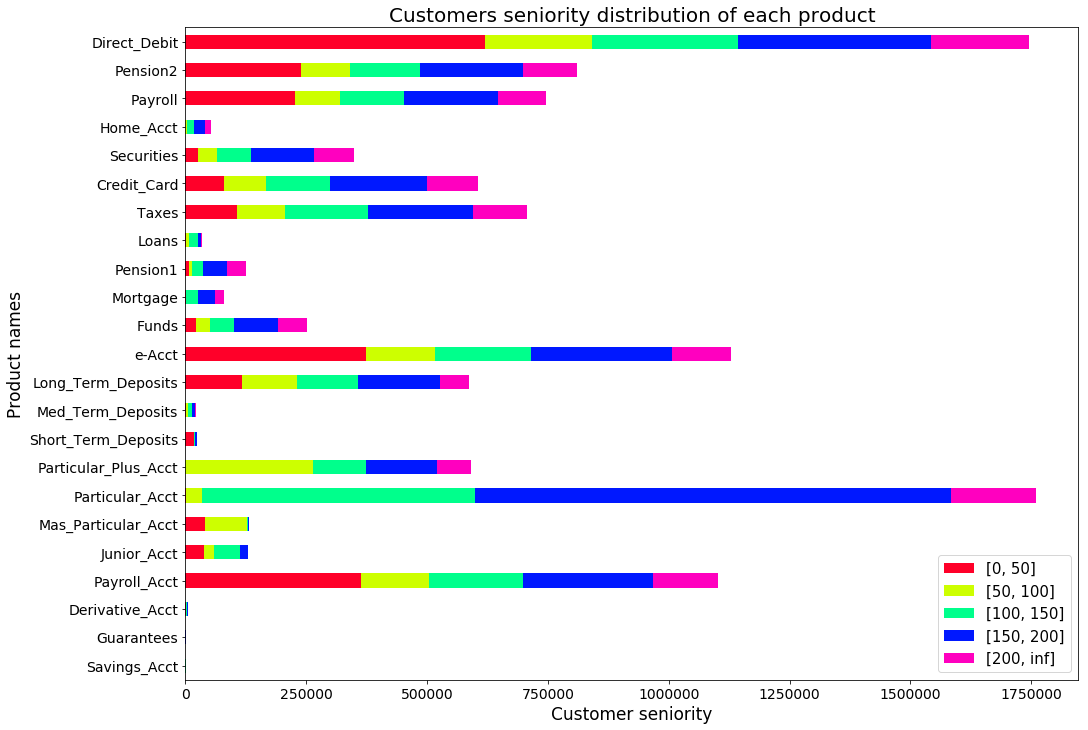

In [61]:
# Customers' seniority distribution of each product
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='gist_rainbow')
plt.title('Customers seniority distribution of each product', fontsize=20, color='black') 
plt.xlabel('Customer seniority', fontsize=17, color='black') 
plt.ylabel('Product names', fontsize=17, color='black') 
plt.legend([[0, 50], [50, 100], [100, 150], [150, 200], [200, inf]], prop={'size':15}) 

In [88]:
df.loc[df["Cust_Since"]<0, 'Cust_Since'] = 0

In [89]:
df_a = df.loc[:, ['Cust_Since']].join(df.loc[:, 'Savings_Acct':'tot_products'])
df_a.head()

,Cust_Since,Savings_Acct,Guarantees,Cur_Acct,Derivative_Acct,Payroll_Acct,Junior_Acct,Mas_Particular_Acct,Particular_Acct,Particular_Plus_Acct,Short_Term_Deposits,Med_Term_Deposits,Long_Term_Deposits,e-Acct,Funds,Mortgage,Pension1,Loans,Taxes,Credit_Card,Securities,Home_Acct,Payroll,Pension2,Direct_Debit,tot_products
0,6.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1.0
1,35.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1.0
2,35.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1.0
3,35.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1.0
4,35.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,1.0


In [89]:
df_a.groupby("tot_products").agg("mean")

,Cust_Since,Savings_Acct,Guarantees,Cur_Acct,Derivative_Acct,Payroll_Acct,Junior_Acct,Mas_Particular_Acct,Particular_Acct,Particular_Plus_Acct,...,Mortgage,Pension1,Loans,Taxes,Credit_Card,Securities,Home_Acct,Payroll,Pension2,Direct_Debit
tot_products,,,,,,,,,,,,,,,,,,,,,
0.0,82.124277,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1.0,58.712773,0.000037,0.000000,0.847444,0.000058,0.010163,0.017906,0.005550,0.056628,0.012897,...,0.000768,0.002274,0.002041,0.009637,0.002777,0.002066,0.000926,0.000000,0.000032,0.002526
2.0,103.438498,0.000138,0.000000,0.903877,0.000630,0.045406,0.000423,0.024442,0.377635,0.065180,...,0.001533,0.005936,0.006596,0.044429,0.019150,0.026773,0.005504,0.000744,0.003629,0.243602
3.0,114.687215,0.000392,0.000003,0.793608,0.001421,0.185431,0.000140,0.027252,0.354210,0.112630,...,0.010502,0.021071,0.003511,0.145887,0.105274,0.100412,0.014273,0.098445,0.111772,0.367205
4.0,116.368564,0.000576,0.000080,0.566645,0.001751,0.432704,0.000004,0.020261,0.295827,0.147248,...,0.017399,0.034445,0.003122,0.221574,0.203070,0.125129,0.015604,0.307146,0.335087,0.648773
5.0,129.744127,0.000335,0.000066,0.390452,0.002153,0.647084,0.000000,0.021536,0.267505,0.200951,...,0.035383,0.049068,0.003432,0.315076,0.325360,0.137539,0.015579,0.508296,0.555736,0.806087
6.0,142.169084,0.000341,0.000180,0.269432,0.001593,0.816757,0.000009,0.021366,0.257139,0.253532,...,0.059058,0.060324,0.004726,0.431342,0.474382,0.150651,0.017597,0.709914,0.762610,0.899329
7.0,155.403816,0.000403,0.000283,0.270398,0.001972,0.896052,0.000000,0.019691,0.281269,0.334596,...,0.092703,0.086717,0.007011,0.575747,0.614168,0.199365,0.022412,0.833168,0.874933,0.947301
8.0,166.719825,0.000118,0.000959,0.346117,0.002692,0.919555,0.000000,0.016102,0.327454,0.415490,...,0.138392,0.141557,0.009614,0.646055,0.709938,0.312901,0.035396,0.879431,0.920488,0.966128


In [90]:
df_a = df_a.dropna(axis=0)
df_a = df_a.groupby("tot_products").agg("mean")

In [91]:
df_b = df_a.loc[:, ['Cust_Since']]
df_b.head()

,Cust_Since
tot_products,
0.0,142.677500
1.0,73.246894
2.0,116.116597
3.0,126.603572
4.0,130.275260


Text(0,0.5,'Average seniority')

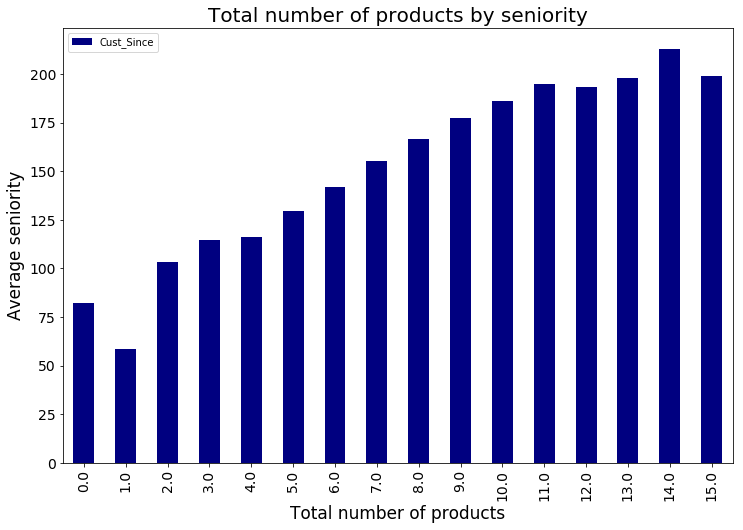

In [95]:
df_b.plot(kind='bar', fontsize=14, figsize=[12,8], colormap='jet')
plt.title('Total number of products by seniority', fontsize=20, color='black') 
plt.xlabel('Total number of products', fontsize=17, color='black') 
plt.ylabel('Average seniority', fontsize=17, color='black') 

#### Ownership of products by customers on a monthly basis

In [92]:
df.Emp_Status.value_counts(dropna=False)

N      988260
NaN     10782
B         387
A         287
F         282
S           2
Name: Emp_Status, dtype: int64

In [93]:
df_a = df["tot_products"].value_counts().to_frame()

count = df["Cust_ID"].count()
df_a["percentage"] = (df_a["tot_products"]/count)*100
df_a

,tot_products,percentage
1.0,565921,56.5921
2.0,193363,19.3363
3.0,79137,7.9137
4.0,44992,4.4992
0.0,32438,3.2438
5.0,30248,3.0248
6.0,22983,2.2983
7.0,15989,1.5989
8.0,8744,0.8744
9.0,4041,0.4041


In [94]:
df[df.tot_products == 0.00]['Cust_Active_Status'].value_counts()

0.0    29267
1.0      973
Name: Cust_Active_Status, dtype: int64

#### Age vs Target Variables

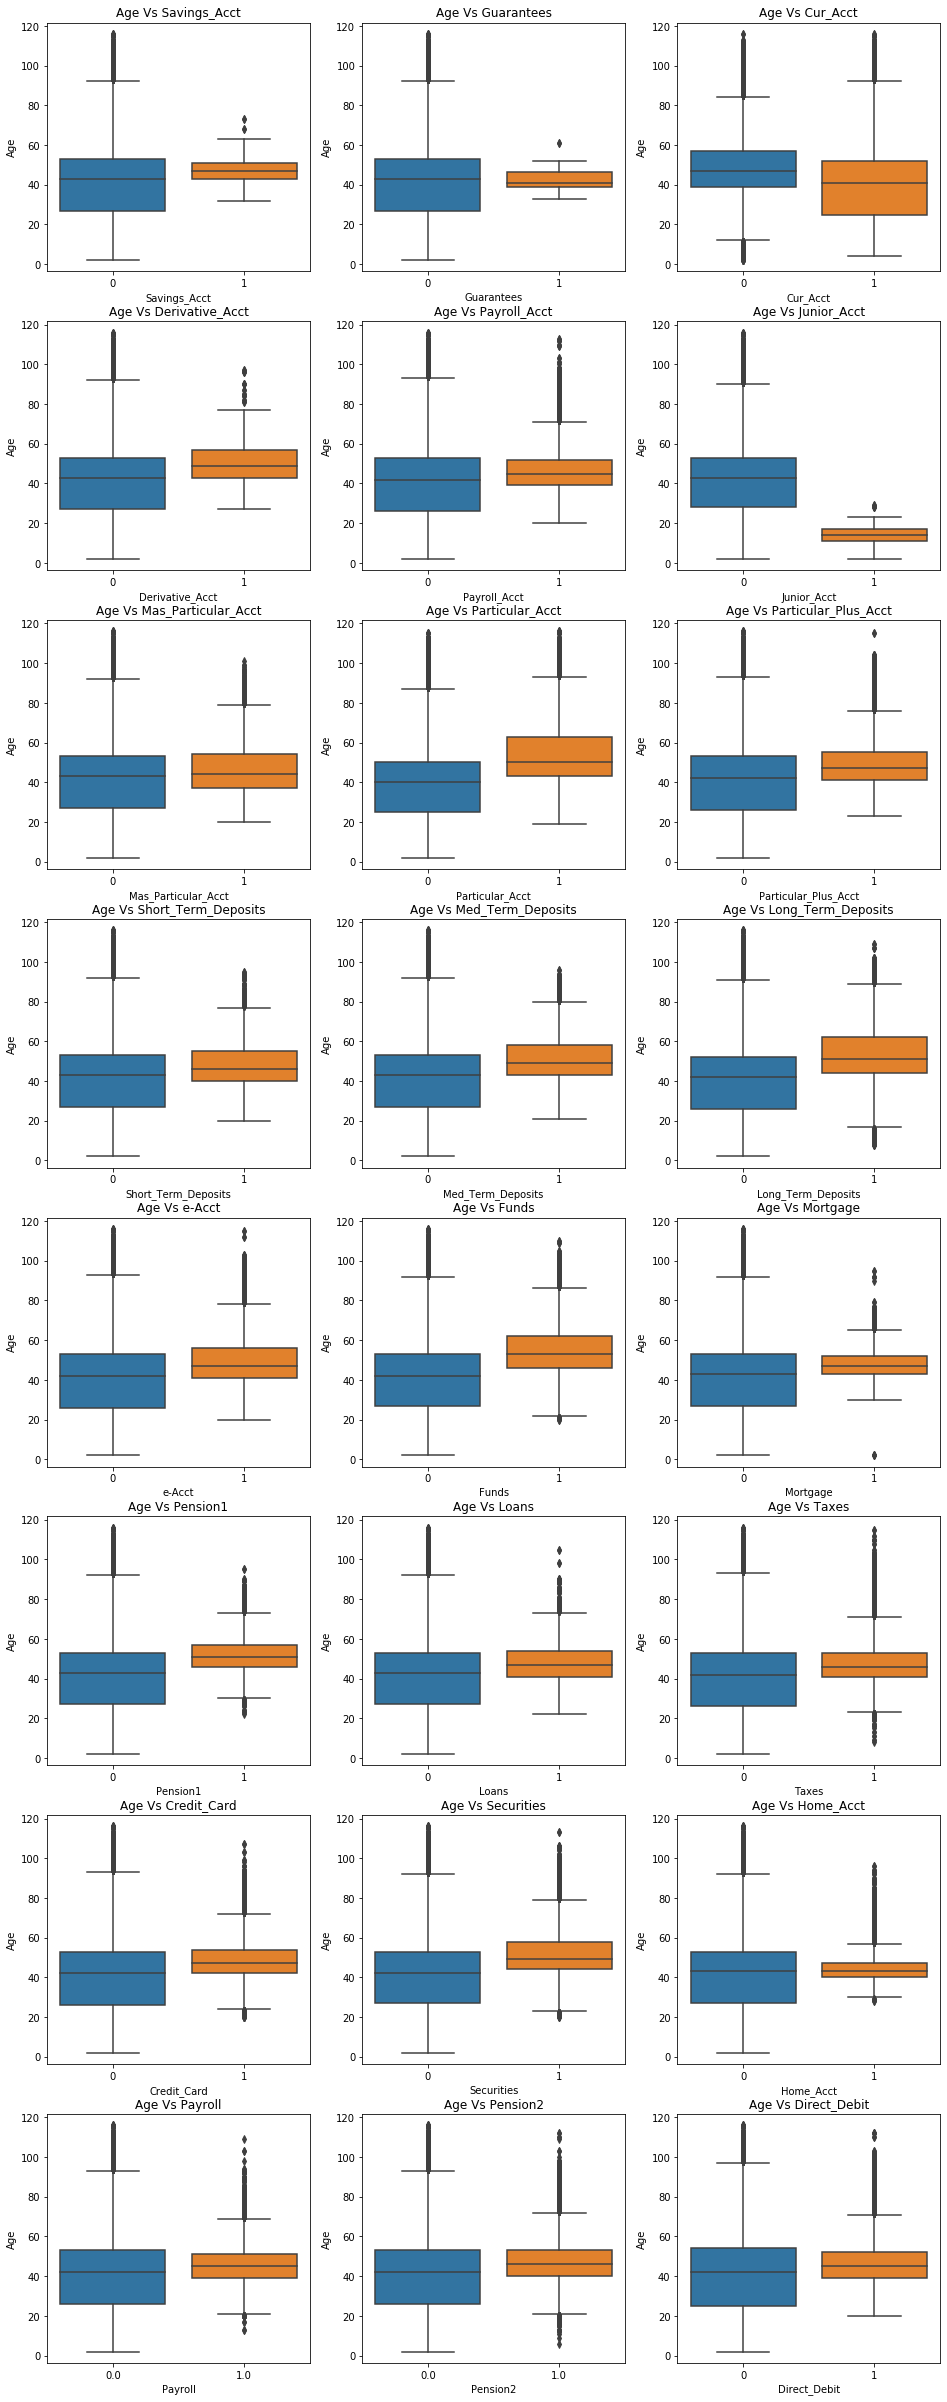

In [95]:
fig = plt.figure(figsize=(16, 120))

plot_count = 0
for ind, target_var in enumerate(target_variables):
    plot_count += 1
    plt.subplot(22, 3, plot_count)
    sns.boxplot(x=target_var, y='Age', data=df)
    plt.title('Age Vs ' + target_var)
plt.show()

In [96]:
df.Age.max(), df.Age.min()

(116.0, 2.0)

In [97]:
df.Age.quantile(0.999)

101.0

In [98]:
age_max_cap = df.Age.quantile(0.999)
df["Age"].loc[df["Age"] > age_max_cap] = age_max_cap

In [99]:
df_a = df.loc[:, ['Age']].join(df.loc[:, "Savings_Acct": "Direct_Debit"])

In [100]:
make_product_and_sum = {column:'sum' for column in df_a.columns.drop(['Age']).tolist()}

In [101]:
df_a = df_a.groupby('Age').agg(make_product_and_sum).reindex_axis(df_a.columns.drop('Age'), 1) 
df_a.head()

,Savings_Acct,Guarantees,Cur_Acct,Derivative_Acct,Payroll_Acct,Junior_Acct,Mas_Particular_Acct,Particular_Acct,Particular_Plus_Acct,Short_Term_Deposits,Med_Term_Deposits,Long_Term_Deposits,e-Acct,Funds,Mortgage,Pension1,Loans,Taxes,Credit_Card,Securities,Home_Acct,Payroll,Pension2,Direct_Debit
Age,,,,,,,,,,,,,,,,,,,,,,,,
2.0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0.0,0.0,0
3.0,0,0,0,0,0,85,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4.0,0,0,2,0,0,143,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
5.0,0,0,0,0,0,193,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
6.0,0,0,0,0,0,200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0


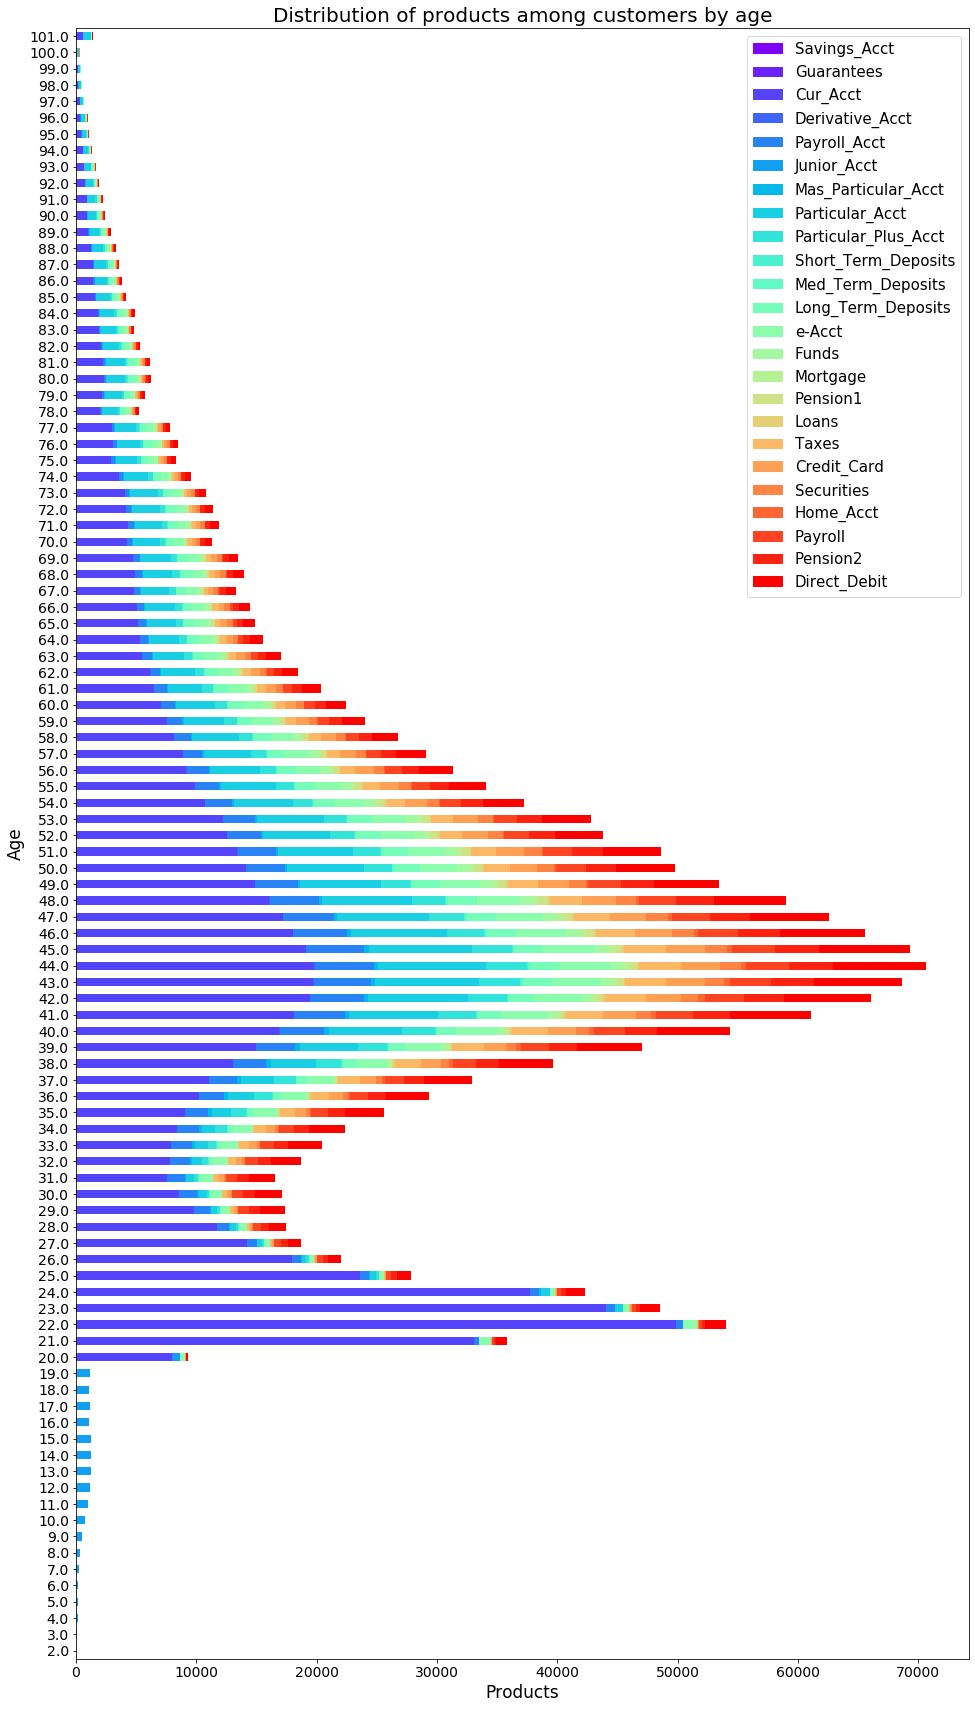

In [102]:

df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,30], colormap='rainbow')
plt.title('Distribution of products among customers by age', fontsize=20, color='black') 
plt.xlabel('Products', fontsize=17, color='black') 
plt.ylabel('Age', fontsize=17, color='black') 
plt.legend(prop={'size':15}, loc=1) 

There are 2 peaks - one between the ages 20 and 26 and another between 39 and 60.
#### Customer Seniority vs Target Variables

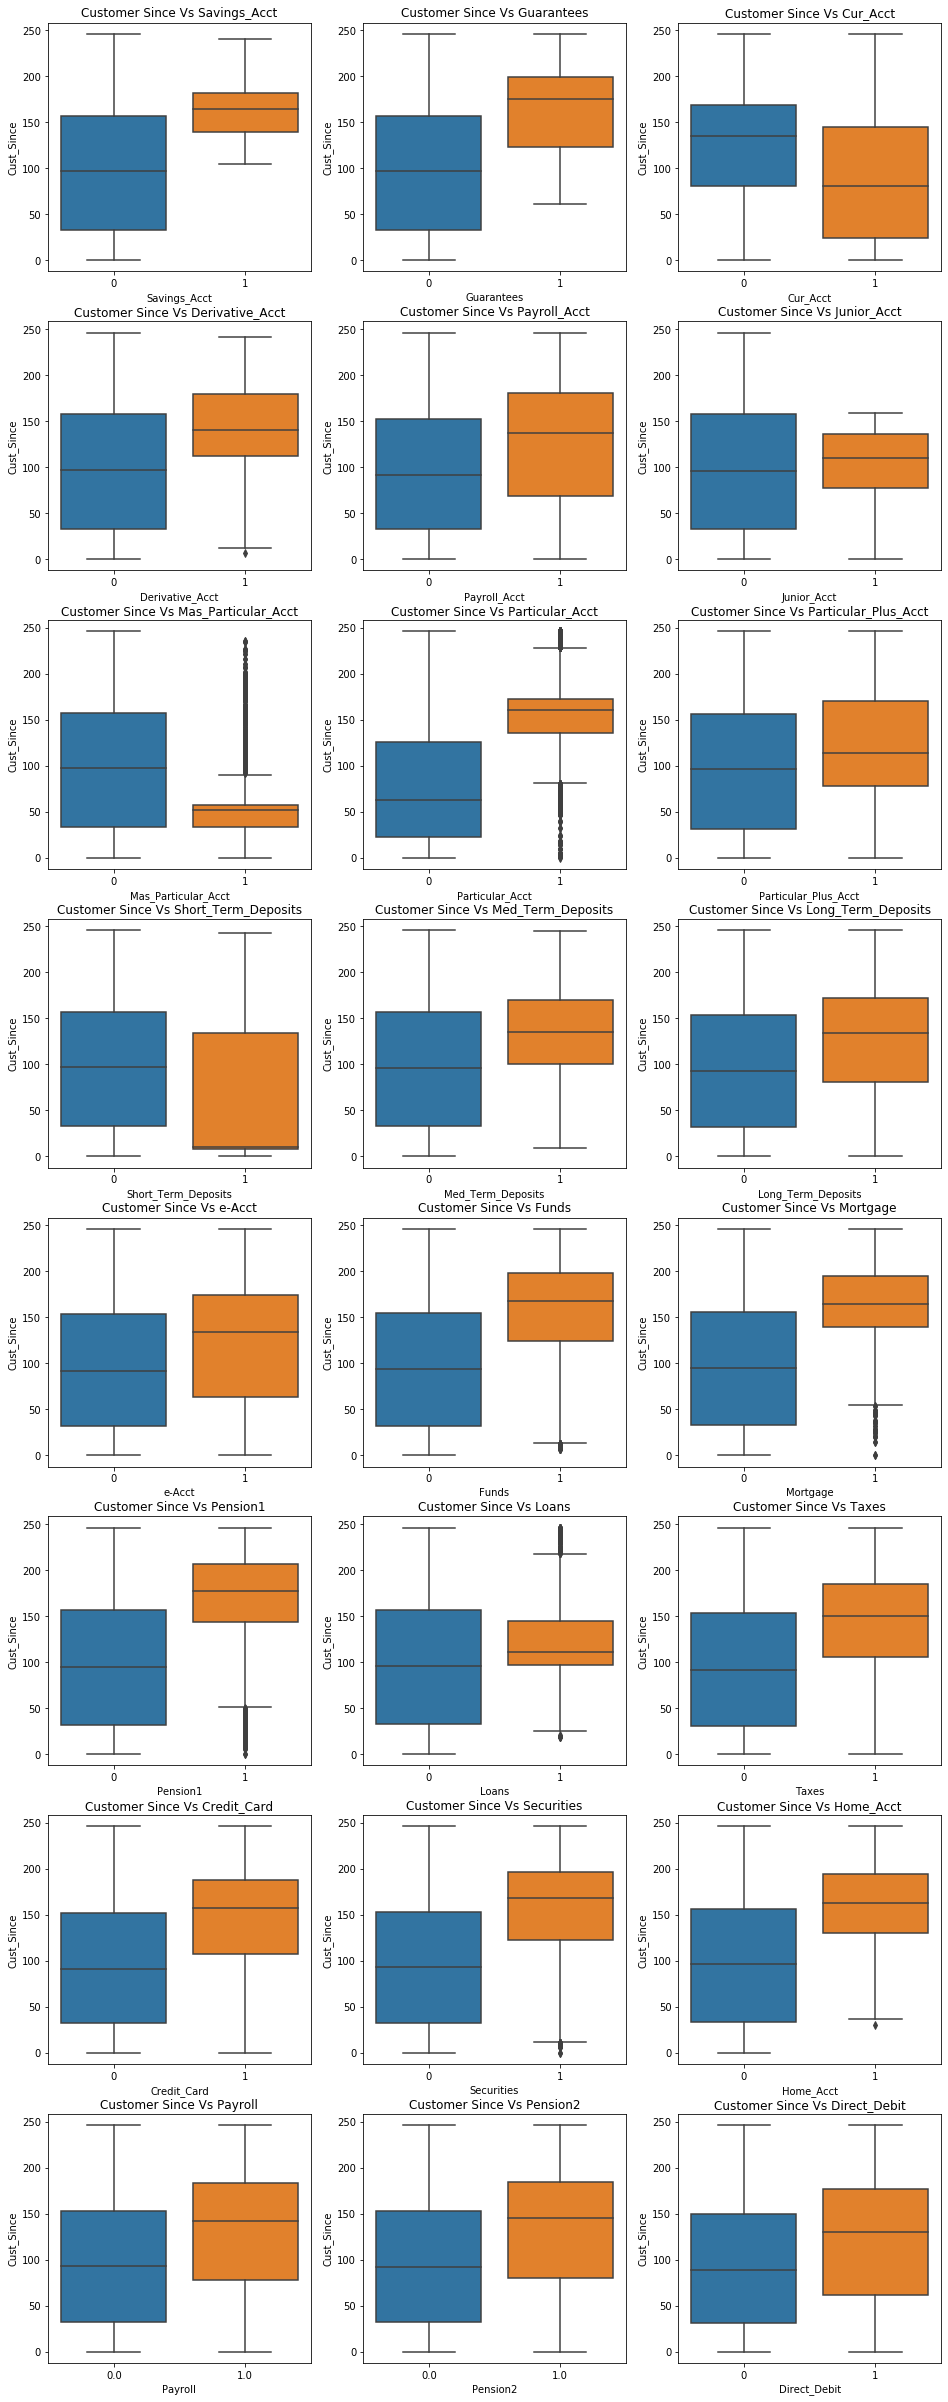

In [103]:
fig = plt.figure(figsize=(16, 120))

plot_count = 0
for ind, target_var in enumerate(target_variables):
    plot_count += 1
    plt.subplot(22, 3, plot_count)
    sns.boxplot(x=target_var, y='Cust_Since', data=df)
    plt.title('Customer Since Vs ' + target_var)
plt.show()

In [104]:
df['Cust_Since'].min(), df['Cust_Since'].median()

(0.0, 97.0)

In [105]:
df[df['Cust_Since'] == df['Cust_Since'].min()]['Cust_Since'].count()

53

In [106]:
df["Cust_Since"].loc[df["Cust_Since"] == -999999.0] = 50

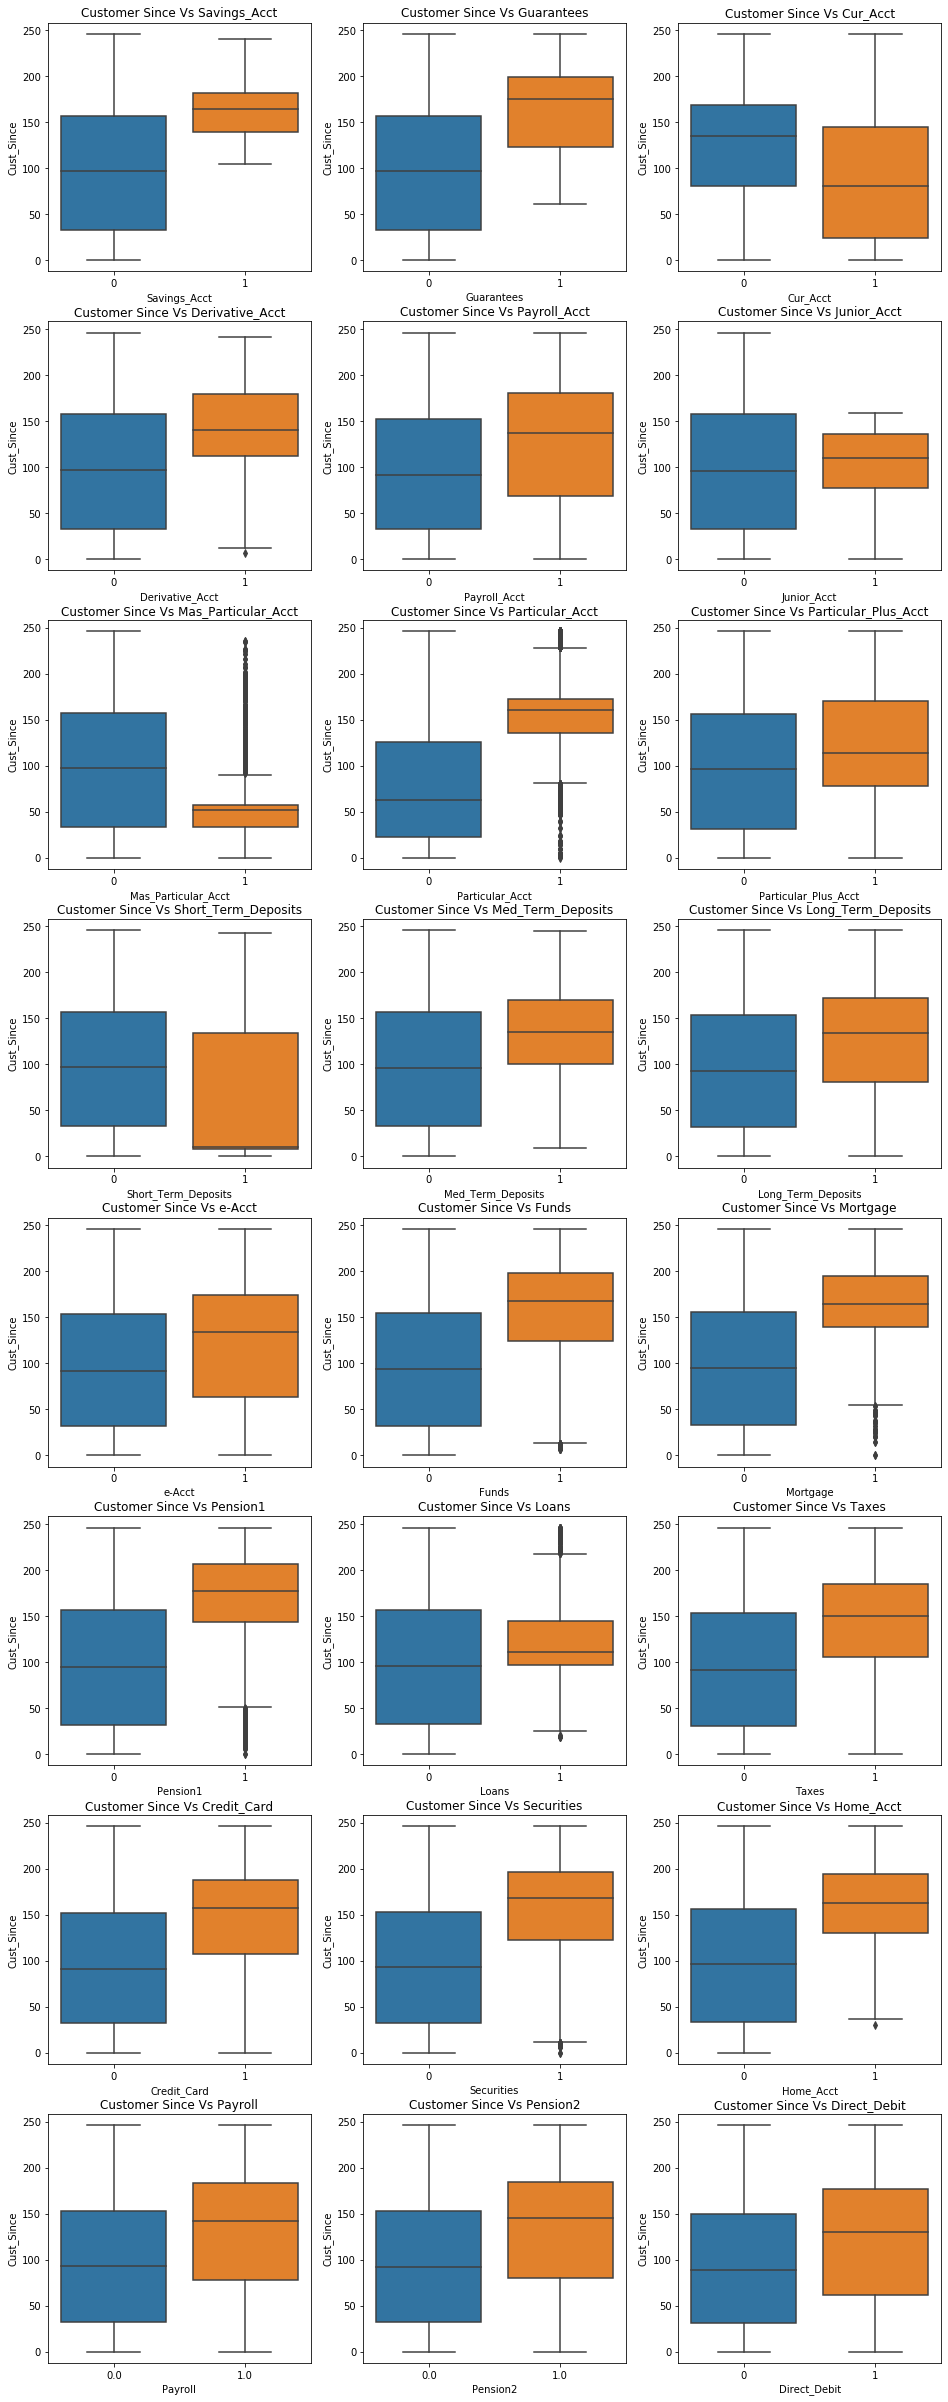

In [107]:
fig = plt.figure(figsize=(16, 120))

plot_count = 0
for ind, target_var in enumerate(target_variables):
    plot_count += 1
    plt.subplot(22, 3, plot_count)
    sns.boxplot(x=target_var, y='Cust_Since', data=df)
    plt.title('Customer Since Vs ' + target_var)
plt.show()

#### HouseHold Income vs Target Variables

In [108]:
hhld_income_max_cap = df.Gross_HHLD_Income.quantile(0.999)
df["Gross_HHLD_Income"].loc[df["Gross_HHLD_Income"]>hhld_income_max_cap] = hhld_income_max_cap

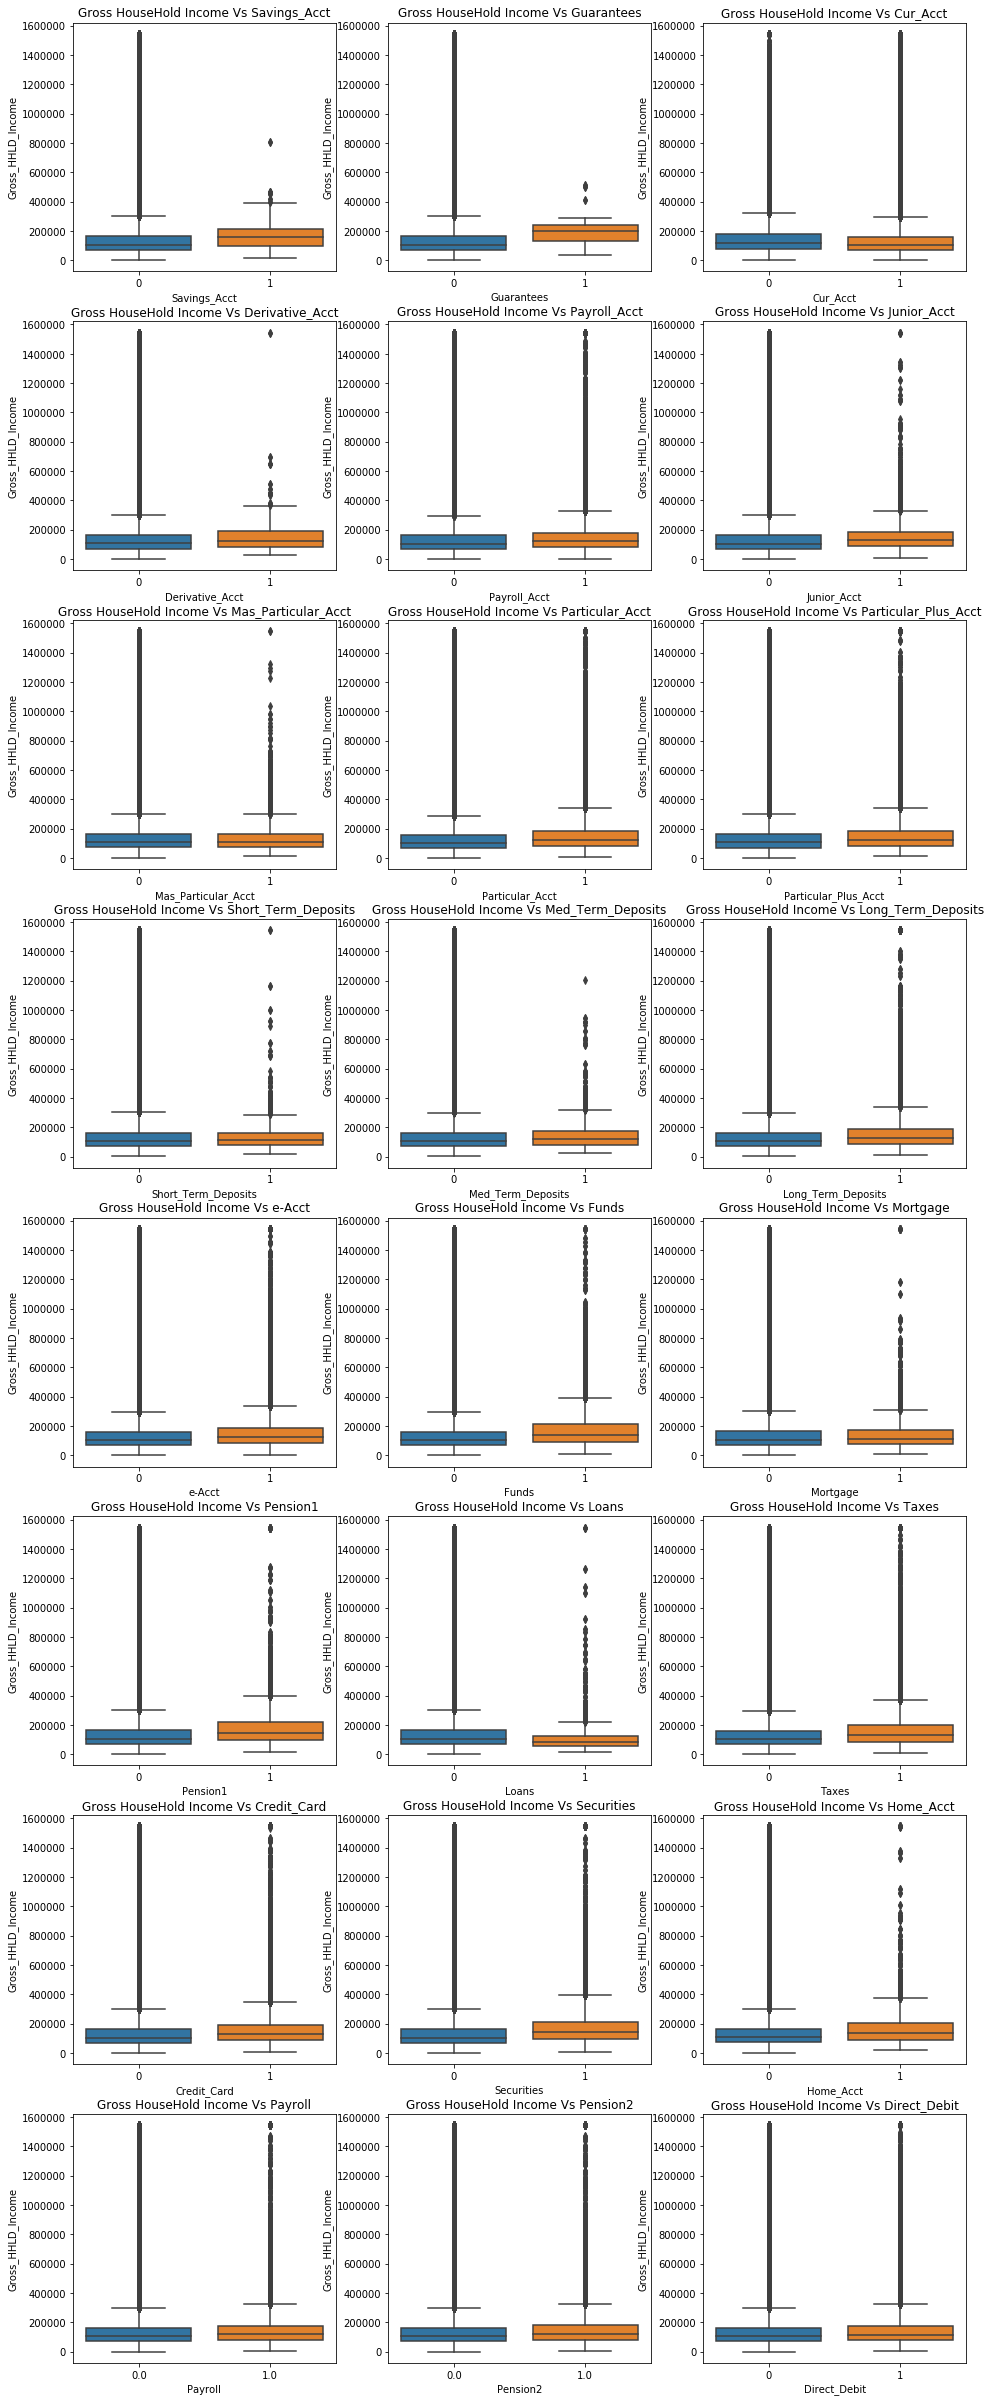

In [109]:
fig = plt.figure(figsize=(16, 120))

plot_count = 0
for ind, target_var in enumerate(target_variables):
    plot_count += 1
    plt.subplot(22, 3, plot_count)
    sns.boxplot(x=target_var, y='Gross_HHLD_Income', data=df)
    plt.title('Gross HouseHold Income Vs ' + target_var)
plt.show()

#### Total number of products by segmentation

In [113]:
df_a = df.groupby('Cust_Segment')['tot_products'].agg('sum')

df_a

Cust_Segment
01 - TOP               253131.0
02 - PARTICULARES     1313936.0
03 - UNIVERSITARIO     321762.0
Name: tot_products, dtype: float64

Text(0.5, 1.0, 'Number of products by segment')

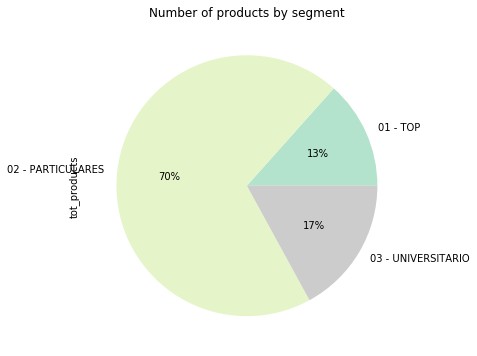

In [114]:
df_a.plot(x=None, y=None, kind='pie', autopct='%1.0f%%',colormap = 'Pastel2')
plt.title('Number of products by segment') 

In [115]:
df.Emp_Status.value_counts(dropna=False)

N      988260
NaN     10782
B         387
A         287
F         282
S           2
Name: Emp_Status, dtype: int64

In [116]:
cust_ids = df.Cust_ID.unique()

In [117]:
cust_ids[:10]

array([1375586, 1050611, 1050612, 1050613, 1050614, 1050615, 1050616,
       1050617, 1050619, 1050620])

In [118]:
pd.set_option('display.max_columns', 500)

In [120]:
cols = ['Status_Dt', 'Cust_ID', 'Savings_Acct', 'Guarantees', 'Cur_Acct', 'Derivative_Acct', 'Payroll_Acct',
                'Junior_Acct', 'Mas_Particular_Acct', 'Particular_Acct', 'Particular_Plus_Acct', 'Short_Term_Deposits',
                'Med_Term_Deposits', 'Long_Term_Deposits', 'e-Acct', 'Funds', 'Mortgage', 'Pension1', 'Loans',
                'Taxes', 'Credit_Card', 'Securities', 'Home_Acct', 'Payroll', 'Pension2', 'Direct_Debit']
df[df.Cust_ID==1050617][cols]

,Status_Dt,Cust_ID,Savings_Acct,Guarantees,Cur_Acct,Derivative_Acct,Payroll_Acct,Junior_Acct,Mas_Particular_Acct,Particular_Acct,Particular_Plus_Acct,Short_Term_Deposits,Med_Term_Deposits,Long_Term_Deposits,e-Acct,Funds,Mortgage,Pension1,Loans,Taxes,Credit_Card,Securities,Home_Acct,Payroll,Pension2,Direct_Debit
7,2015-01-28,1050617,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [121]:
df.Emp_Status.value_counts(dropna=False)

N      988260
NaN     10782
B         387
A         287
F         282
S           2
Name: Emp_Status, dtype: int64

## Fill missing values

In [122]:
features=['Status_Dt', 'Cust_ID', 'Emp_Status', 'Cust_Ctry', 'Cust_Sex', 'Age', 'Join_Dt',
                'Is_New_Cust', 'Cust_Since', 'Relship_Status','Lst_Dt_Primary_Cust', 'Cust_Type_Mth_Beg', 
                'Cust_Relship_Type_Mth_Beg', 'Residence_Ctry', 'Is_Foreigner', 'Is_Spouse_Emp', 'Join_Channel', 'Deceased_Flg', 
                'Address_Type', 'Cust_Province_Cd', 'Cust_Province_Name', 'Cust_Active_Status', 'Gross_HHLD_Income',
                'Cust_Segment']

In [123]:
df_test = pd.read_csv("/home/samar/internship/test1/data/test_ver2.csv")
df_test.columns = features

In [124]:
def missing_values_table(df_train, df_test):
        mis_val_train = df_train.isnull().sum()
        mis_val_train = mis_val_train[mis_val_train.values != 0].to_frame()
        mis_val_train.reset_index(level=0, inplace=True)
        mis_val_train.columns= ['Column Name', 'Missing Values']

        mis_val_test = df_test.isnull().sum()
        mis_val_test = mis_val_test[mis_val_test.values != 0].to_frame()
        mis_val_test.reset_index(level=0, inplace=True)
        mis_val_test.columns= ['Column Name', 'Missing Values']
        
        missing_values = pd.merge(mis_val_train, mis_val_test, on='Column Name', how='outer', suffixes=(' Train', ' Test'))

        missing_values['% of Total Values-Train'] = 100 * missing_values['Missing Values Train'] / len(df_train)
        missing_values['% of Total Values-Test'] = 100 * missing_values['Missing Values Test'] / len(df_test)

        missing_values = missing_values[
            missing_values.iloc[:,1] != 0].sort_values(
        '% of Total Values-Train', ascending=False).round(1)
     

        print ("Your selected dataframe has " + str(df_train.shape[1]) + " columns(train).\n"      
            "There are " + str(missing_values.shape[0]) +
              " columns that have missing values.")
        
        
        return missing_values


missing_values = missing_values_table(df[features], df_test)
missing_values

Your selected dataframe has 24 columns(train).
There are 21 columns that have missing values.


,Column Name,Missing Values Train,Missing Values Test,% of Total Values-Train,% of Total Values-Test
13,Is_Spouse_Emp,999822,929511.0,100.0,100.0
8,Lst_Dt_Primary_Cust,998899,927932.0,99.9,99.8
19,Gross_HHLD_Income,175183,NaN,17.5,NaN
17,Cust_Province_Name,17734,3996.0,1.8,0.4
16,Cust_Province_Cd,17734,3996.0,1.8,0.4
20,Cust_Segment,10895,2248.0,1.1,0.2
14,Join_Channel,10861,2081.0,1.1,0.2
2,Cust_Sex,10786,5.0,1.1,0.0
12,Is_Foreigner,10782,NaN,1.1,NaN
18,Cust_Active_Status,10782,NaN,1.1,NaN


We will go through the list from the top.

In [125]:
df.Is_Spouse_Emp.value_counts(dropna=False)

NaN    999822
N         176
S           2
Name: Is_Spouse_Emp, dtype: int64

In [126]:
df.loc[df["Is_Spouse_Emp"].isnull(),"Is_Spouse_Emp"] = "N"
df_test.loc[df_test["Is_Spouse_Emp"].isnull(),"Is_Spouse_Emp"] = "N"

In [127]:
df.Lst_Dt_Primary_Cust.dtype

dtype('<M8[ns]')

In [128]:
df.loc[df["Lst_Dt_Primary_Cust"].isnull(),"Lst_Dt_Primary_Cust"] = "2020-12-31"
df_test.loc[df_test["Lst_Dt_Primary_Cust"].isnull(),"Lst_Dt_Primary_Cust"] = "2020-12-31"

In [129]:
df.loc[df["Gross_HHLD_Income"].isnull(),"Gross_HHLD_Income"] = np.nanmedian(df.Gross_HHLD_Income)

In [130]:
df.Cust_Segment.value_counts(dropna=False)

02 - PARTICULARES     658385
03 - UNIVERSITARIO    273318
01 - TOP               57402
NaN                    10895
Name: Cust_Segment, dtype: int64

In [131]:
df.loc[df["Cust_Segment"].isnull(),"Cust_Segment"] = '02 - PARTICULARES'
df_test.loc[df_test["Cust_Segment"].isnull(),"Cust_Segment"] = '02 - PARTICULARES'

In [132]:
df.Join_Channel.value_counts().head()

KAT    313944
KFC    259035
KHE    249254
KFA     37733
KAS      8190
Name: Join_Channel, dtype: int64

In [133]:
df.loc[df["Join_Channel"].isnull(),"Join_Channel"] = 'KHE'
df_test.loc[df_test["Join_Channel"].isnull(),"Join_Channel"] = 'KHE'

In [134]:
df.Cust_Type_Mth_Beg.value_counts(dropna=False)

1.0    989175
NaN     10782
3.0        41
2.0         2
Name: Cust_Type_Mth_Beg, dtype: int64

In [135]:
df_test.Cust_Type_Mth_Beg.value_counts(dropna=False)

1.0    929565
3.0        27
NaN        23
Name: Cust_Type_Mth_Beg, dtype: int64

In [136]:
df["Cust_Type_Mth_Beg"] = df["Cust_Type_Mth_Beg"].map(lambda x: 5.0 if x == "P" else x).astype(float).fillna(0.0).astype(np.int8)
df_test["Cust_Type_Mth_Beg"] = df_test["Cust_Type_Mth_Beg"].map(lambda x: 5.0 if x == "P" else x).astype(float).fillna(0.0).astype(np.int8)

In [137]:
df.Cust_Relship_Type_Mth_Beg.value_counts(dropna=False)

A      547800
I      441377
NaN     10782
P          41
Name: Cust_Relship_Type_Mth_Beg, dtype: int64

In [138]:
df.loc[df["Cust_Relship_Type_Mth_Beg"].isnull(),"Cust_Relship_Type_Mth_Beg"] = 'I'
df_test.loc[df_test["Cust_Relship_Type_Mth_Beg"].isnull(),"Cust_Relship_Type_Mth_Beg"] = 'I'

In [139]:
df.Cust_Province_Cd.value_counts().head()

28.0    360131
8.0      87372
46.0     46394
41.0     43922
15.0     27545
Name: Cust_Province_Cd, dtype: int64

In [140]:
df.loc[df["Cust_Province_Cd"].isnull(),"Cust_Province_Cd"] = 28.0
df_test.loc[df_test["Cust_Province_Cd"].isnull(),"Cust_Province_Cd"] = 28.0

In [141]:
df.Cust_Province_Name.value_counts().head()

MADRID       360131
BARCELONA     87372
VALENCIA      46394
SEVILLA       43922
CORUÑA, A     27545
Name: Cust_Province_Name, dtype: int64

In [142]:
df.loc[df["Cust_Province_Name"].isnull(),"Cust_Province_Name"] = 'MADRID'
df_test.loc[df_test["Cust_Province_Name"].isnull(),"Cust_Province_Name"] = 'MADRID'

In [143]:
df.Cust_Sex.value_counts(dropna=False)

V      562000
H      427214
NaN     10786
Name: Cust_Sex, dtype: int64

In [144]:
df.loc[df["Cust_Sex"].isnull(),"Cust_Sex"] = 'V'
df_test.loc[df_test["Cust_Sex"].isnull(),"Cust_Sex"] = 'V'

In [145]:
df.Address_Type.value_counts(dropna=False)

1.0    989218
NaN     10782
Name: Address_Type, dtype: int64

In [146]:
df.loc[df["Address_Type"].isnull(),"Address_Type"] = 1.0
df_test.loc[df_test["Address_Type"].isnull(),"Address_Type"] = 1.0

In [147]:
df.Emp_Status.value_counts(dropna=False)

N      988260
NaN     10782
B         387
A         287
F         282
S           2
Name: Emp_Status, dtype: int64

In [148]:
df.loc[df["Emp_Status"].isnull(),"Emp_Status"] = 'N'
df_test.loc[df_test["Emp_Status"].isnull(),"Emp_Status"] = 'N'

In [149]:
df.Cust_Ctry.value_counts().head()

ES    982264
FR       546
AR       542
DE       487
GB       480
Name: Cust_Ctry, dtype: int64

In [150]:
df.loc[df["Cust_Ctry"].isnull(),"Cust_Ctry"] = 'ES'
df_test.loc[df_test["Cust_Ctry"].isnull(),"Cust_Ctry"] = 'ES'

In [151]:
df.Join_Dt.value_counts().head()

2013-10-14    3920
2013-08-03    3738
2014-07-28    3285
2014-10-03    2861
2013-10-11    2686
Name: Join_Dt, dtype: int64

We will update Join Date to be the first transaction date for that customer

In [152]:
df.shape

(1000000, 49)

In [153]:
#get all the customers
cust_ids = df[df.Join_Dt.isnull()]['Cust_ID']
tmp = df[df.Cust_ID.isin(cust_ids)].groupby(['Cust_ID', 'Status_Dt']).size().to_frame()
tmp.reset_index(level=[0,1], inplace=True)
tmp.columns=['Cust_ID', 'Status_Dt','Count']
tmp.drop(columns='Count', inplace=True)
tmp = tmp.join(tmp.groupby('Cust_ID')['Status_Dt'].agg(['min', 'max']), on='Cust_ID')

In [154]:
tmp.drop(['Status_Dt'], axis = 1, inplace=True)
tmp.drop_duplicates(keep='first', inplace=True)
tmp.rename(index=str, columns={"Cust_ID": "Cust_ID", "min": "Min_Status_Dt", "max":"Max_Status_Dt"}, inplace=True)
tmp.head()

,Cust_ID,Min_Status_Dt,Max_Status_Dt
0,16513,2015-01-28,2015-02-28
2,17025,2015-01-28,2015-02-28
4,17196,2015-01-28,2015-02-28
6,17488,2015-01-28,2015-02-28
8,17792,2015-01-28,2015-02-28


In [155]:
df = df.merge(tmp, on='Cust_ID', how = 'outer')
#updte Join Date to be the same as Min Status Date
df.loc[df.Join_Dt.isnull(), 'Join_Dt'] = df.Min_Status_Dt

In [156]:
df.drop(columns=['Min_Status_Dt', 'Max_Status_Dt'], inplace=True)

In [157]:
df.shape

(1000000, 49)

In [159]:
df.Cust_Active_Status.value_counts(dropna=False).head()


1.0    558879
0.0    430339
NaN     10782
Name: Cust_Active_Status, dtype: int64

In [160]:
df["Relship_Status"].fillna(1.0, inplace=True)
df["Residence_Ctry"].fillna('S', inplace=True)
df["Is_Foreigner"].fillna('N', inplace=True)
df["Deceased_Flg"].fillna('N', inplace=True)
df["Cust_Active_Status"].fillna(0.0, inplace=True)

In [161]:
df['Age'] = pd.to_numeric(df.Age, errors='coerce')

In [162]:
df["Age"].fillna(df.Age.mean(), inplace=True)

In [163]:
months_active = df.loc[df["Is_New_Cust"].isnull(),:].groupby("Cust_ID", sort=False).size()
months_active.max()

2

In [164]:
#update them to be customers who registered themselves in the past 6 months.
df.loc[df['Is_New_Cust'].isnull(), 'Is_New_Cust'] = 1

In [165]:
df.loc[df['Cust_Since'].isnull(), 'Cust_Since'] = 1

In [166]:
missing_values = missing_values_table(df[features], df_test)
missing_values

Your selected dataframe has 24 columns(train).
There are 0 columns that have missing values.


,Missing Values Train,Column Name,Missing Values Test,% of Total Values-Train,% of Total Values-Test


In [167]:
df.Cust_Type_Mth_Beg.value_counts()

1    989175
0     10782
3        41
2         2
Name: Cust_Type_Mth_Beg, dtype: int64

In [169]:
#save
df.to_csv('/home/samar/internship/test1/Data/cleaned_train_ver2.csv', index=False)
df_test.to_csv('/home/samar/internship/test1/Data/cleaned_test_ver2.csv', index=False)